# Importing packages 

In [3]:
import sys
sys.path.append('../../src/')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import statsmodels.api as sm
import copy
from scipy import sparse
import scipy.stats
import random
from fitter import Fitter
import attr
from causalgraphicalmodels import CausalGraphicalModel, StructuralCausalModel
from collections import defaultdict, OrderedDict
import pylogit as pl
import viz

# 0. Functions for Documentation Purposes 

## 0.1. Distribution Fitting Class Definition - **Could be removed** - For Documentation Purposes

In [5]:
# class FitDistribution(object):
#     """Fit and simulate data to known distributions.

#     Input:
#     ------
#     - data: array-like or dataframe.
#     - dists: list.
#         This parameter contains a list of distributions to be explored.
#         When None, every available distribution on scipy is explored.
#     - bins: int.
#         Numbers of bins to be used for the cumulative histogram. This has
#         an impact on the quality of the fit.
#     - timeout: int.
#         Maximum time for a given distribution. If timeout is reached,
#         the distribution is skipped.
#         """
#     def __init__(self, data, dists=None, timeout=30, verbose=False, bins=100):
#         self.data = data
#         # self.var_types = var_types
#         self.dists = dists
#         self.timeout = timeout
#         self.verbose = verbose
#         self.bins = bins
#         self.ArrayDistDict = defaultdict()
#         self.params_dict = defaultdict(dict)

#     def FindArrayDist(self, cat_var):
#         """Function to extract the best distribution for a specified array.
#         Uses the fit method from the Fitter module in the fitter library
#         Inputs:
#         -------
#         - cat_var: boolean
#             Boolean to signify whether the variable to be simulated
#             is discrete/categorical or continuous.

#         Outputs:
#         -------
#         By default, the function returns a dictionary with best distribution
#         name and parameters associated with it. If a number of distributions
#         was specified, the function returns a pandas DataFrame with
#         the N best distributions, along with a plot showing all of them."""
#         self.ArrayDistDict = dict()
#         if cat_var is True:
#             self.ArrayDistDict['distribution'] = 'categorical'
#             np_array_range = np.arange(self.data.max()+1)
#             array_bincount = np.bincount(self.data)
#             probs = array_bincount / len(self.data)

#             self.ArrayDistDict['parameters'] = [np_array_range,
#                                                 probs]
#         else:
#             fitter_object = Fitter(data=self.data,
#                                    distributions=self.dists,
#                                    timeout=self.timeout)
#             fitter_object.fit()
#             BestDict = fitter_object.get_best()
#             self.ArrayDistDict['distribution'] = list(BestDict.items())[0][0]
#             self.ArrayDistDict['parameters'] = list(BestDict.items())[0][1]
#         return self.ArrayDistDict

#     def SimArray(self, size=100):
#         """Function to simulate data for an array based on the best fitted
#         distribution.
#         Input:
#         -----
#         - size : int
#                 size of the array to be simulated.
#         Outputs:
#         -------
#         Simulated array based on the best fit distribution."""
#         if self.ArrayDistDict['distribution'] == 'categorical':
#             value = self.ArrayDistDict['parameters'][0]
#             freq = self.ArrayDistDict['parameters'][1]
#             Sim_Array = np.random.choice(a=value,
#                                          p=freq,
#                                          size=size)
#         else:
#             dist = getattr(scipy.stats, self.ArrayDistDict['distribution'])
#             Sim_Array = dist.rvs(*self.ArrayDistDict['parameters'], size=size)
#         return Sim_Array

#     def FindDfDist(self, var_types):
#         """Function to extract the best distribution from a specified
#         dataframe. Uses the function find_dist, which in turn uses the
#         fit method from the Fitter module in the fitter library
#         Inputs:
#         -------
#         - var_types: dictionary
#             Dictionary with keys as column names for dataset variables,
#             the value of each key is a string showing whether the
#             variable is discrete/cat or continuous.

#         Outputs:
#         -------
#         *FOR NOW*, the function returns a dictionary showing the best
#         distribution name for each array in the dataframe and parameters
#         associated with it.
#         """

#         for column in list(self.data.columns):

#             if var_types[column] == 'categorical':
#                 if len(self.data[column].unique()) == 1:
#                     self.params_dict[column]['distribution'] = 'constant'
#                     self.params_dict[column]['parameters'] = \
#                         self.data[column].unique()
#                 else:
#                     self.params_dict[column]['distribution'] = 'categorical'
#                     np_array_range = np.arange(self.data[column].max()+1)
#                     array_bincount = np.bincount(self.data[column])
#                     probs = array_bincount / len(self.data[column])
#                     self.params_dict[column]['parameters'] = [np_array_range,
#                                                               probs]
#             else:
#                 if len(self.data[column].unique()) == 1:
#                     self.params_dict[column]['distribution'] = 'constant'
#                     self.params_dict[column]['parameters'] = \
#                         self.data[column].unique()
#                 else:
#                     fitter_object = Fitter(data=self.data[column],
#                                            distributions=self.dists,
#                                            timeout=self.timeout)
#                     fitter_object.fit()
#                     BestDict = fitter_object.get_best()
#                     self.params_dict[column]['distribution'] = \
#                         list(BestDict.items())[0][0]
#                     self.params_dict[column]['parameters'] = \
#                         list(BestDict.items())[0][1]
#         return self.params_dict

#     def SimDf(self, size=1000):
#         """Funtion to simulate data of size N based on specified
#         distribution/parameters found by the fitter package.
#         Inputs:
#         -------
#         data: dataframe from which columns are to be taken
#         dist_params: the distribution parameters from find_dist_df
#         Outputs:
#         -------
#         DataFrame object with simulated data based on specified distributions
#         """
#         Sim_Df = pd.DataFrame(columns=list(self.params_dict.keys()))
#         Sim_Df = Sim_Df.fillna(0)
#         for column in list(self.params_dict.keys()):
#             if self.params_dict[column]['distribution'] == 'categorical':
#                 value = self.params_dict[column]['parameters'][0]
#                 freq = self.params_dict[column]['parameters'][1]
#                 data_sim = np.random.choice(a=value,
#                                             p=freq,
#                                             size=size)
#                 Sim_Df[column] = data_sim
#             elif self.params_dict[column]['distribution'] == 'constant':
#                 data_sim = self.params_dict[column]['parameters'][0]
#                 Sim_Df[column] = data_sim
#             else:
#                 dist = getattr(scipy.stats,
#                                self.params_dict[column]['distribution'])
#                 data_sim = dist.rvs(*self.params_dict[column]['parameters'],
#                                     size=size)
#                 Sim_Df[column] = data_sim
#         return Sim_Df

## 0.2. Functions to calculate probabilities for each alternative - **(Replaced by functions from TB)** - For Documentation Purposes

In [6]:
# def add_intercept_to_df(df_long, specification_dict):

#     if ("intercept" in specification_dict
#             and "intercept" not in df_long.columns):
#         df_long["intercept"] = 1
#     return None


# def create_design_matrix(df_long, specification_dict,
#                          names_dict, alternative_id_col):

#     add_intercept_to_df(df_long, specification_dict)

#     columns = []
#     for col in specification_dict:
#         for group in specification_dict[col]:
#             if type(group) == list:
#                 columns.append(df_long[alternative_id_col].isin(group)
#                                * df_long[col])
#             else:
#                 columns.append((df_long[alternative_id_col] == group)
#                                * df_long[col])

#     design_matrix = np.stack(columns, axis=1)

#     var_names = []
#     for variable in names_dict:
#         for name in names_dict[variable]:
#             var_names.append(name)

#     return design_matrix, var_names


# def calculate_utilities(betas, design_matrix):

#     limit_max = 700
#     limit_min = -700

#     utility = design_matrix.dot(betas)
#     utility[utility > limit_max] = limit_max
#     utility[utility < limit_min] = limit_min

#     utilities = np.exp(utility)

#     return utilities


# def create_mapping_matrix(df_long, observation_id_col):
#     row_to_col_matrix = pd.get_dummies(df_long[observation_id_col]).values
# #     row_to_col_matrix = (df_long[observation_id_col].values[:,None] ==
# #                          np.sort(df_long[observation_id_col].unique())[None,:]).astype(int)
#     sparse_row_to_col_matrix = sparse.csr_matrix(row_to_col_matrix)

#     mapping_matrix = sparse_row_to_col_matrix.dot(sparse_row_to_col_matrix.T)

#     return mapping_matrix


# def calculate_probabilities(betas, design_matrix, mapping_matrix):

#     utilities = calculate_utilities(betas, design_matrix)
#     denominator = mapping_matrix.dot(utilities)
#     probabilities = utilities/denominator
#     probabilities[probabilities == 0] = 1e-300

#     return probabilities

## 0.3. Function to simulate choices based on long data format - For Documentation Purposes

In [7]:
# def SimulateChoices(long_data, alt_id_col,
#                     obs_id_col, number_alts,
#                     spec_dic, names_dic, init_betas):
#     """
#     Function to simulate choices from a long data
#     format dataset.
    
#     Parameters
#     ----------
#     long_data : DataFrame
#         The DataFrame to be used, in long format.
#     alt_id_col: string
#         Name of the column containing the alternative
#         id numbers in the long format dataset.
#     obs_id_col: string
#         Name of the column containing the observation
#         id numbers in the long format dataset.
#     number_alts: int
#         Number of alternatives in the long format
#         dataset.
#     spec_dic: dictionary
#         Dictionary of the model specification.
#     names_dic: dictionary
#         Dictionary of the alternative names.
#     init_betas: list
#         List of the initial betas for the model
#         from which the choices should be simulated.
    
#     Returns
#     -------
#     DataFrame object with the simulated choices column
#     added as 'sim_choice'
#     """
#     # Declare the simulated choice column name
#     sim_choice_col = 'sim_choice'

#     # Make a copy of the data
#     data = copy.deepcopy(long_data)
#     # Functions to generate the design matrix, mapping matrix,
#     # and calculate the probabilities for each alternative
#     design_matrix, names = create_design_matrix(df_long=data,
#                                                 specification_dict=spec_dic,
#                                                 names_dict=names_dic,
#                                                 alternative_id_col=alt_id_col)
#     mapping_matrix = create_mapping_matrix(df_long=data,
#                                            observation_id_col=obs_id_col)
#     probabilities = calculate_probabilities(betas=initial_betas,
#                                             design_matrix=design_matrix,
#                                             mapping_matrix=mapping_matrix)
#     # Assign calculated probabilities to new dataframe column
#     data['probabilities'] = probabilities
#     # Initialize cumulative sum and simulated choice columns
#     data['cum_sum'] = 0
#     data['sim_choice'] = 0

#     # Loop around the observations and compute probabilities' cumulative
#     # sums for each alternative
#     for observation in data['observation_id'].unique():
#         probs_sum = data[long_data.observation_id == observation]['probabilities'].cumsum()
#         data.loc[data['observation_id'] == observation, 'cum_sum'] = probs_sum

#     # Generate list for observation ids to be used in simulating choices    
#     observation_id_list = list(data.observation_id.unique())
#     # Generate a "random utility" array of the same size as the number
#     # of observations in the dataset
#     u_random = np.random.uniform(size=len(data['observation_id'].unique()))

#     # Loop around the generate utilities and observations in the dataset
#     # to assign a choice to each
#     for u, obs in zip(u_random, observation_id_list):
#         # select data for observation number "obs"
#         data_sample = data[data['observation_id'] == obs]
#         # generate list of available modes for each observation
#         sorted_list = sorted(list(data_sample['mode_id'].unique()))
#         # initialize a dictionary from the available modes for 
#         # each observation
#         choices = dict.fromkeys(sorted_list, 0)
#         # Loop round the modes for each observation and assign 
#         # choice (0 vs. 1)
#         for alt in sorted_list:
#             choices[alt] = np.where(u <= data_sample[data_sample['mode_id']
#                                                      == alt]
#                                     ['cum_sum'], 1, 0).item()
#             # Once a choice is assigned, break out of loop
#             if choices[alt] == 1:
#                 break
#         # Map the choices for the observation to the long format dataframe       
#         data.loc[data.observation_id == obs, sim_choice_col] = \
#             data['mode_id'].map(choices)
#     return data

In [8]:
# ## These functions are to be ignored, they are here for historical purposes

# def CreateChoiceDF(*argv):
#     """
#     Function that generates a dataframe object for all desired variables.
#     Input:
#     ------
#     Series of tuples showing the variable and desired variable name
#     in the output dataframe.
#     Example, if the user desired to created a dataframe with 2 variables,
#     the function should be called as follows:
#     df = CreateChoiceDF(("var1_name", var1),("var2_name", var2))  
#     Output:
#     -------
#     DataFrame object
#     """
#     data_dict = dict()
#     for arg in argv:
#         data_dict[arg[0]] = arg[1]
#     sample_data = pd.DataFrame(data_dict)
#     return sample_data

# def SimulateChoices(data, alt_id_col, obs_id_col, number_alts, spec_dic, names_dic, init_betas):

# # This commented out block is to extend the capabilities of the function from simulating choices
# # only based on long data to wide data. The logic is built out completely, all we need is to 
# # refactor it and adjust the parameters in the function definition.
# #     choice_var = 'choice'
# #     custom_alt_id = "alternative_id"
# #     obs_id_column = "custom_id"

# #     # Adding a Choice Variable Column
# #     data[choice_var] = np.random.randint(1, high=number_alts+1, size=data.shape[0])
# #     availability_variables = dict()

# #     # Adding availability variables and specifying alternative availability numbers
# #     for alt in np.arange(1, number_alts+1, 1):
# #         data['AV_' + str(alt)] = 1
# #         availability_variables[alt] = 'AV_' + str(alt)

# #     # Specifying the Individual Variables
# #     ind_variables = ind_variables

# #     alt_varying_variables = alt_var_vars
# #     # Specifying the column heading for the alternative id column in the
# #     # long format dataset
# #     custom_alt_id = "alternative_id"
# #     obs_id_column = "custom_id"
# #     sample_data[obs_id_column] = np.arange(sample_data.shape[0],
# #                                            dtype=int) + 1

# #     # Create a variable recording the choice column

# #     long_data = pl.convert_wide_to_long(wide_data=sample_data,
# #                                         ind_vars=ind_variables,
# #                                         alt_specific_vars=alt_varying_variables,
# #                                         availability_vars=availability_variables,
# #                                         obs_id_col=obs_id_column,
# #                                         choice_col=choice_var,
# #                                         new_alt_id_name=custom_alt_id)
#     sim_choice_var = 'sim_choice'
#     # Functions to generate the probabilities for each alternative

#     long_data = data

#     design_matrix, names = create_design_matrix(df_long=long_data,
#                                                 specification_dict=mnl_specification,
#                                                 names_dict=mnl_names,
#                                                 alternative_id_col=alt_id_col)
#     mapping_matrix = create_mapping_matrix(df_long=long_data,
#                                            observation_id_col=obs_id_col)
#     probabilities = calculate_probabilities(betas=initial_betas,
#                                             design_matrix=design_matrix,
#                                             mapping_matrix=mapping_matrix)

#     data['probabilities'] = probabilities
#     data['cum_sum'] = 0
#     data['sim_choice'] = 0

#     for observation in data['observation_id'].unique():
#         probs_sum = data[data.observation_id==observation]['probabilities'].cumsum()
#         data.loc[data['observation_id']==observation,'cum_sum'] = probs_sum

#     observation_id_list = list(data.observation_id.unique())
#     u_random = np.random.uniform(size = len(data['observation_id'].unique()))

#     for u,obs in zip(u_random,observation_id_list):
#         data_sample = data[data['observation_id']==obs]
#         sorted_list = sorted(list(data_sample['mode_id'].unique()))
#         choices = dict.fromkeys(sorted_list, 0)
#         for alt in sorted_list:   
#             choices[alt] = np.where(u<=data_sample[data_sample['mode_id']==alt]['cum_sum'], 1, 0).item()
#             if choices[alt] == 1:
#                 break
#         data.loc[data.observation_id==obs,'sim_choice'] = data['mode_id'].map(choices)
#     return data

# 1. Define functions to be used in notebook

In [9]:
def DistNodeNoParent(data_long,
                     alt_id_col,
                     obs_id_col,
                     alt_spec_dic,
                     alt_name_dic,
                     ind_spec,
                     trip_spec,
                     var_types,
                     cont_dists=None):
    """
    Function to find the distribution of specific variables
    from a long format dataset.
    
    Parameters
    ----------
    data_long: Pandas DataFrame
        Dataset in long format from which variable
        distribution is to be found.
        
    alt_id_col: string
        Name of the column with alternative ids.
        
    obs_id_col: string
        Name of the column with observation ids.
        
    alt_spec_dic: dictionary
        Dictionary with keys as the ordered number
        of alternatives, and the value for each key
        is a list of strings representing the name of
        variables without parents per alternative.
        
    alt_name_dic: dictionary
        Dictionary with keys as the ordered number
        of alternatives, and the value for each key
        is a string representing the name of the 
        alternative.
        
    ind_spec: list
        List containing strings of the names of 
        individual specific variables.
        
    trip_spec: list
        List containing string of the names of 
        trip specific variables.
        
    var_types: dictionary
        Dictionary with keys as strings of names of variables
        from long format dataset, and values for each key are
        the type of variables (e.g.: 'categorical vs. continuous').
        
    cont_dists: list
        List of continuous RVs distribution names from scipy.
        
    Returns
    -------
    a nested dictionary with keys as variable names and values
    as dictionaries containing both the distribution name and
    its parameters.
    """
    
    params_dict = {}

    # Code for Individual Specific Variables
    for ind in ind_spec:
        # generate array of values for individual specific variable
        ind_var = pd.Series([(data_long.loc[data_long[obs_id_col] == x][ind].unique()[0]) for x in data_long[obs_id_col].unique()])  
        # Get distribution if variable is categorical
        if var_types[ind] in ['categorical', 'numerical']:
            # If only one category
            if len(ind_var.unique()) == 1:
                params_dict.setdefault(ind,{})['distribution'] = 'constant'
                params_dict.setdefault(ind,{})['parameters'] = ind_var.unique()
            # If more than one category
            else:
                params_dict.setdefault(ind,{})['distribution'] = 'categorical'
                # Count frequency of values and store it as paramater of distribution
                np_array_range = np.arange(ind_var.max()+1)
                array_bincount = np.bincount(ind_var)
                probs = array_bincount / len(ind_var)
                params_dict.setdefault(ind,{})['parameters'] = [np_array_range,
                                                  probs]
        else:
            # If not categorical but just one unique value
            if len(ind_var.unique()) == 1:
                params_dict.setdefault(ind,{})['distribution'] = 'constant'
                params_dict.setdefault(ind,{})['parameters'] = ind_var.unique()
            # If not categorical but not one unique value
            else:
                # Use the Fitter library to fit distributions
                # to the data
                fitter_object = Fitter(data=ind_var,
                                       distributions=cont_dists,
                                       timeout=30)
                fitter_object.fit()
                # Get the best distribution and store in dictionary
                BestDict = fitter_object.get_best()
                params_dict.setdefault(ind,{})['distribution'] = list(BestDict.items())[0][0]
                params_dict.setdefault(ind,{})['parameters'] = list(BestDict.items())[0][1]

    # Code for Alternative Specific Variables
    # Loop around the different available alternatives
    for alt in data_long[alt_id_col].unique():
        # Store data for specific alternative (mode)
        mode_data = data_long.loc[data_long[alt_id_col] == alt]
        # Loop around the alternative specific variables in the input dictionary
        for var in alt_spec_dic[alt]:
            # If data is to be taken as empirical values
            if var_types[var] == 'empirical':
                # If only one value
                if len(mode_data[var].unique()) == 1:
                    # Add name of alternative to variable and store distriburion & parameters
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['distribution'] = 'constant'
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['parameters'] = mode_data[var].unique()
                else:
                    # Add name of alternative to variable and store distriburion & parameters
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['distribution'] = 'empirical'
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['parameters'] = np.array(mode_data[var])
            # If data is categorical
            elif var_types[var] == 'categorical':
                # If only one category
                if len(mode_data[var].unique()) == 1:
                    # Add name of alternative to variable and store distriburion & parameters
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['distribution'] = 'constant'
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['parameters'] = mode_data[var].unique()
                else:
                    # If more than one category, compute the frequency of values
                    # and store as parameters
                    # Add name of alternative to variable and store distriburion & parameters
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['distribution'] = 'categorical'
                    np_array_range = np.arange(mode_data[var].max()+1)
                    array_bincount = np.bincount(mode_data[var])
                    probs = array_bincount / len(mode_data[var])
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['parameters'] = [np_array_range,
                                                                            probs]
            else:
                # If data is not categorical but has one unique value
                if len(mode_data[var].unique()) == 1:
                    # Add name of alternative to variable and store distriburion & parameters
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['distribution'] = 'constant'
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['parameters'] = mode_data[var].unique()
                # If data is not categorical but has more than one unique value
                else:
                    # Use the Fitter library to fit distributions
                    # to the data
                    fitter_object = Fitter(data=mode_data[var],
                                           distributions=cont_dists,
                                           timeout=30)
                    fitter_object.fit()
                    # Get the best distribution and store in dictionary
                    BestDict = fitter_object.get_best()
                    # Add name of alternative to variable and store distriburion & parameters
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['distribution'] = list(BestDict.items())[0][0]
                    params_dict.setdefault(var +'_'+ alt_name_dic[alt], {})['parameters'] = list(BestDict.items())[0][1]

    # Trip Specific Variable (maybe combine with individual specific variables)
    # Loop around trip (observation) specific variables
    for var in trip_spec:
        # generate array of values for trip specific variable
        trip_var = pd.Series([(data_long.loc[data_long[obs_id_col] == x][var].unique()[0]) for x in data_long[obs_id_col].unique()])
        # If data is to be taken as empirical values
        if var_types[var] == 'empirical':
            # If data has one unique value
            if trip_var.unique() == 1:
                params_dict.setdefault(var, {})['distribution'] = 'constant'
                params_dict.setdefault(var, {})['parameters'] = np.array(trip_var.unique())
            # If data has more than one unique value
            else:
                params_dict.setdefault(var, {})['distribution'] = 'empirical'
                params_dict.setdefault(var, {})['parameters'] = np.array(trip_var)
        # Get distribution if variable is categorical
        elif var_types[var] == 'categorical':
            # If only one category
            if len(trip_var.unique()) == 1:
                params_dict.setdefault(var, {})['distribution'] = 'constant'
                params_dict.setdefault(var, {})['parameters'] = trip_var.unique()
            # If more than one category
            else:
                params_dict.setdefault(var, {})['distribution'] = 'categorical'
                # Count frequency of values and store it as paramater of distribution
                np_array_range = np.arange(trip_var.max()+1)
                array_bincount = np.bincount(trip_var)
                probs = array_bincount / len(trip_var)
                params_dict.setdefault(var, {})['parameters'] = [np_array_range,
                                                  probs]
        else:
            # If not categorical but just one unique value
            if len(trip_var.unique()) == 1:
                params_dict.setdefault(var, {})['distribution'] = 'constant'
                params_dict.setdefault(var, {})['parameters'] = trip_var.unique()
            # If not categorical but just one unique value
            else:
                # Use the Fitter library to fit distributions
                # to the data
                fitter_object = Fitter(data=trip_var,
                                       distributions=cont_dists,
                                       timeout=30)
                fitter_object.fit()
                # Get the best distribution and store in dictionary
                BestDict = fitter_object.get_best()
                params_dict.setdefault(var, {})['distribution'] = list(BestDict.items())[0][0]
                params_dict.setdefault(var, {})['parameters'] = list(BestDict.items())[0][1]

    return params_dict


def SimNodeNoParent(params_dict, size=1000):
    """
    Funtion to simulate data of size N based on specified
    distribution/parameters found by the fitter package.
    
    Paremeters
    ----------
    dist_params: dictionary
        The variable distribution dictionary resulting from
        `FindLongDataDist`.
        
    size: int
        Size of the desired simulated dataset, default value
        is 1000 observations.
    
    Returns
    -------
    DataFrame object with simulated data based on specified distributions
    """
    # Create Empty DataFrame with keys from params_dict
    Sim_Df = pd.DataFrame(columns=list(params_dict.keys()))
    Sim_Df = Sim_Df.fillna(0)
    
    # Loop around each of the variables in params_dict
    # and simulate data for them
    for column in list(params_dict.keys()):
        # Simulate data for categorical variables
        if params_dict[column]['distribution'] == 'categorical':
            value = params_dict[column]['parameters'][0]
            freq = params_dict[column]['parameters'][1]
            data_sim = np.random.choice(a=value,
                                        p=freq,
                                        size=size)
            Sim_Df[column] = data_sim
        
        # Simulate variables for data with a single unique value
        elif params_dict[column]['distribution'] == 'constant':
            data_sim = params_dict[column]['parameters'][0]
            Sim_Df[column] = data_sim
        
        # Simulate data using values from array, sampling
        # with replacement
        elif params_dict[column]['distribution'] == 'empirical':
            data_sim = np.random.choice(params_dict[column]['paramaters'], size=size)
            Sim_Df[column] = data_sim
        
        # Simulate data for continuous variables
        else:
            # Get scipy distribution from its
            # name in the params dictionary
            dist = getattr(scipy.stats,
                           params_dict[column]['distribution'])
            data_sim = dist.rvs(*params_dict[column]['parameters'],
                                size=size)
            Sim_Df[column] = data_sim
        
    return Sim_Df


def FitAlternativeRegression(regressions, reg_types, data):
    
    """
    Function to store regression models based on causal graph
    in a dictionary.
    
    Parameters
    ----------
    regressions: dictionary
        Dictionary with keys as integers representing the
        order of regressions. Values of the dictionary
        are tuples/lists with the first item is a string
        of the name of the independent variable and the
        second item is a string of the name of the 
        dependent variable.
    
    reg_types: dictionary
        Dictionary with keys as integers representing the
        order of regressions. Keys should be similar to the
        keys from the `regressions` dictionary. Values are
        strings representing the type of regressions to be
        ran. **TODO: add more regressions**
        
    Returns
    -------
    Dictionary with keys as the regression name and values
    as regression models stores. Methods from these fitted
    models can be accessed through the values of the dictionary.
    """
    
    # Initiate the regressions results dictionary
    regression_results = {}
    
    # Loop around the regressions
    for reg in regressions.keys():
        # If linear regression
        if reg_types[reg] == 'linear':
            # Prepare data and initialize model
            data_x = sm.add_constant(data[regressions[reg][0]])
            data_y = data[regressions[reg][1]]
            model = sm.OLS(data_y, data_x)

            # Fit model
            results = model.fit()
            
            # Store model
            regression_results[regressions[reg][1]+'_on_'+regressions[reg][0]] = results
        
        # If logistic regression **TODO: Expand on
        # logistic regression
        if reg_types[reg] == 'logistic':
            # Prepare data and initialize model
            data_x = sm.add_constant(data[regressions[reg][0]])
            data_y = data[regressions[reg][1]]
            model = sm.Logit(data_y, data_x)

            # Fit model
            results = model.fit()
            
            # Store model
            regression_results[regressions[reg][1]+'_on_'+regressions[reg][0]] = results
    
    #if plotting:
    #    fig = plt.figure(figsize=(12,8))
    #    fig = sm.graphics.plot_regress_exog(results, X[0], fig=fig)
    
    return regression_results


def SimulateAvailability(data_long, sim_data, obs_id_col, alt_name_dict):
    """
    Function to simulate alternative availability based on a long format
    dataset and join the availability data to the simulated dataset
    resulting from SimDf.
    
    Parameters
    ----------
    data_long: Pandas DataFrame
        Long format dataframe used for simulating
        alternative availability.
    
    sim_data: Pandas DataFrame
        Wide format dataframe resulting from SimDf
    
    obs_id_col: string
        Name of the column in data_long with 
        observation ids.
    
    alt_name_dic: dictionary
        Dictionary with keys as the ordered number
        of alternatives, and the value for each key
        is a string representing the name of the 
        alternative.
        
    Returns
    -------
    Wide format Pandas DataFrame with additional availability
    columns for each of the alternatives.
    
    """
    
    # Create empty Series to hold number of available alternatives
    series = pd.Series([])
    
    # Loop around each observation to record the
    # available number of alternatives for each observation
    for i, obs in zip(np.arange(len(data_long[obs_id_col].unique())), data_long[obs_id_col].unique()):
        series[i] = data_long[data_long[obs_id_col] == obs].shape[0]

    # Simulate number of available alternatives for
    # each observation in sim_data
    av_size = sim_data.shape[0]
    alts_sim = np.random.choice(a=np.arange(series.max()+1),
                                p=np.bincount(series)/len(series),
                                size=av_size)

    # Simulate the availability matrix based on number 
    # of available alternatives
    N = len(alt_name_dict)
    av_sim = [np.array([1] * K + [0]*(N-K)) for K in alts_sim]
    
    # Shuffle the available alternatives for each observation
    # because av_sim will always start with 1s
    for x in av_sim:
        np.random.shuffle(x)

    # Shuffle the availability across different observations
    np.random.shuffle(av_sim)
    
    # Create columns for the availability matrix
    AV_columns = [alt_name_dict[i]+'_AV' for i in alt_name_dict.keys()]
    
    # Create alternative availability matrix with AV_columns
    AV_Df = pd.DataFrame(av_sim, columns=AV_columns)
    
    # Create an random choice column based on available
    # alternatives for each observation - This column will
    # be needed when converting to long data
    fake_choice = [random.choice(np.nonzero(a == 1)[0]) + 1 for a in np.array(AV_Df)]
    fake_choice_df = pd.DataFrame(fake_choice, columns=['sim_choice'])
    
    # Concatenate the simulated data with availability data and fake choice data
    # and return Sim_DF_AV
    Sim_DF_AV = pd.concat([sim_data, AV_Df, fake_choice_df], axis=1, sort=False)
    return Sim_DF_AV

# 2. MNL Model Estimation using Bike Data

## 2.1. Data Ingestion and Exploration

In [10]:
# Create a variable for the path to the long format data for
# the multinomial choice model
PATH = '../../data/raw/spring_2016_all_bay_area_long_format_plus_cross_bay_col.csv'

In [11]:
# Reading data from the specified PATH
bike_data_long = pd.read_csv(PATH)

# If in previous work we accidentally saved the index with the dataframe
# remove the old index from the data
if "Unnamed: 0" in bike_data_long.columns:
    del bike_data_long["Unnamed: 0"]

print("The columns of bike_data are:")
bike_data_long.columns

The columns of bike_data are:


Index(['household_id', 'person_id', 'tour_id', 'observation_id', 'mode_id',
       'choice', 'tour_origin_taz', 'primary_dest_taz', 'total_travel_time',
       'total_travel_cost', 'total_travel_distance', 'age', 'household_size',
       'household_income', 'household_income_values', 'transit_subsidy',
       'transit_subsidy_amount', 'num_cars', 'num_licensed_drivers',
       'cross_bay', 'oakland_and_berkeley', 'survey_id', 'gender',
       'non_relative_flag', 'num_pre_school', 'num_school_aged', 'married',
       'parent', 'income_category_1', 'income_category_2', 'income_category_3',
       'income_category_4', 'income_category_5', 'income_category_6',
       'income_category_7', 'income_category_8', 'income_category_9',
       'income_category_10', 'income_unknown', 'ln_drive_cost',
       'ln_drive_cost_sq', 'total_travel_time_10x', 'total_travel_time_tenth',
       'high_income', 'medium_income', 'low_income', 'high_income_cost',
       'medium_income_cost', 'low_income_cost', 

In [12]:
# Look at the mode shares in the data set
alt_id_to_mode_name = {1: "Drive Alone",
                       2: "Shared Ride 2",
                       3: "Shared Ride 3+",
                       4: "Walk-Transit-Walk",
                       5: "Drive-Transit-Walk",
                       6: "Walk-Transit-Drive",
                       7: "Walk",
                       8: "Bike"}

mode_counts = bike_data_long.loc[bike_data_long.choice == 1,
                                 "mode_id"].value_counts().loc[range(1, 9)]

mode_shares = mode_counts / bike_data_long.observation_id.max()
mode_shares.index = [alt_id_to_mode_name[x] for x in mode_shares.index.values]
mode_shares.name = "Mode Shares"
mode_shares

Drive Alone           0.428322
Shared Ride 2         0.158841
Shared Ride 3+        0.139860
Walk-Transit-Walk     0.103397
Drive-Transit-Walk    0.015485
Walk-Transit-Drive    0.013237
Walk                  0.094406
Bike                  0.046454
Name: Mode Shares, dtype: float64

## 2.2. MNL Model Specification 

In [13]:
# Create my specification and variable names for the basic MNL model
# NOTE: - Keys should be variables within the long format dataframe.
#         The sole exception to this is the "intercept" key.
#       - For the specification dictionary, the values should be lists
#         or lists of lists. Within a list, or within the inner-most
#         list should be the alternative ID's of the alternative whose
#         utility specification the explanatory variable is entering.

mnl_specification = OrderedDict()
mnl_names = OrderedDict()

mnl_specification["intercept"] = [2, 3, 4, 5, 6, 7, 8]
mnl_names["intercept"] = ['ASC Shared Ride: 2',
                          'ASC Shared Ride: 3+',
                          'ASC Walk-Transit-Walk',
                          'ASC Drive-Transit-Walk',
                          'ASC Walk-Transit-Drive',
                          'ASC Walk',
                          'ASC Bike']

mnl_specification["total_travel_time"] = [[1, 2, 3], [4, 5, 6]]
mnl_names["total_travel_time"] = ['Travel Time, units:min (All Auto Modes)',
                                  'Travel Time, units:min (All Transit Modes)']

mnl_specification["total_travel_cost"] = [[4, 5, 6]]
mnl_names["total_travel_cost"] = ['Travel Cost, units:$ (All Transit Modes)']

mnl_specification["cost_per_distance"] = [1, 2, 3]
mnl_names["cost_per_distance"] = ["Travel Cost per Distance, units:$/mi (Drive Alone)",
                                  "Travel Cost per Distance, units:$/mi (SharedRide-2)",
                                  "Travel Cost per Distance, units:$/mi (SharedRide-3+)"]

mnl_specification["cars_per_licensed_drivers"] = [[1, 2, 3]]
mnl_names["cars_per_licensed_drivers"] = ["Autos per licensed drivers (All Auto Modes)"]

mnl_specification["total_travel_distance"] = [7, 8]
mnl_names["total_travel_distance"] = ['Travel Distance, units:mi (Walk)',
                                      'Travel Distance, units:mi (Bike)']

# mnl_specification["cross_bay"] = [[2, 3], [4, 5, 6]]
# mnl_names["cross_bay"] = ["Cross-Bay Tour (Shared Ride 2 & 3+)",
#                           "Cross-Bay Tour (All Transit Modes)"]
mnl_specification["cross_bay"] = [[2, 3]]
mnl_names["cross_bay"] = ["Cross-Bay Tour (Shared Ride 2 & 3+)"]

mnl_specification["household_size"] = [[2, 3]]
mnl_names["household_size"] = ['Household Size (Shared Ride 2 & 3+)']

mnl_specification["num_kids"] = [[2, 3]]
mnl_names["num_kids"] = ["Number of Kids in Household (Shared Ride 2 & 3+)"]

## 2.3. Model Estimation

In [14]:
# Estimate the basic MNL model, using the hessian and newton-conjugate gradient
mnl_model = pl.create_choice_model(data=bike_data_long,
                                   alt_id_col="mode_id",
                                   obs_id_col="observation_id",
                                   choice_col="choice",
                                   specification=mnl_specification,
                                   model_type="MNL",
                                   names=mnl_names)

num_vars = len(reduce(lambda x, y: x + y, mnl_names.values()))

# Note newton-cg used to ensure convergence to a point where gradient
# is essentially zero for all dimensions.
mnl_model.fit_mle(np.zeros(num_vars),
                  method="BFGS")

# Look at the estimation results
mnl_model.get_statsmodels_summary()

Log-likelihood at zero: -7,599.7019
Initial Log-likelihood: -7,599.7019


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))
/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.19 seconds.
Final log-likelihood: -5,073.4276


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      choice   No. Observations:                4,004
Model:             Multinomial Logit Model   Df Residuals:                    3,985
Method:                                MLE   Df Model:                           19
Date:                     Sat, 28 Mar 2020   Pseudo R-squ.:                   0.332
Time:                             11:19:48   Pseudo R-bar-squ.:               0.330
AIC:                            10,184.855   Log-Likelihood:             -5,073.428
BIC:                            10,304.461   LL-Null:                    -7,599.702
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
ASC Shared Ride: 2                                      -1.0097      0.486     -2.079      0.038      -1.962      -0.058
ASC Shared Ride: 3+                                      3.4619      1.064      3.254      0.001       1.377       5.547
ASC Walk-Transit-Walk                                   -0.3921      0.288     -1.360      0.174      -0.957       0.173
ASC Drive-Transit-Walk                                  -2.6220      0.303     -8.660      0.000      -3.215      -2.029
ASC Walk-Transit-Drive                                  -2.9773      0.306     -9.725      0.000      -3.577      -2.377
ASC Walk                                                 1.5541      0.305      5.101      0.000       0.957       2.151
ASC Bike                                                -1.1059      0.305     -3.628      0.000      -1.703      -0.508
Travel Time, units:min (All Auto Modes)                 -0.0760      0.006    -13.728      0.000      -0.087      -0.065
Travel Time, units:min (All Transit Modes)              -0.0274      0.002    -12.768      0.000      -0.032      -0.023
Travel Cost, units:$ (All Transit Modes)                -0.1273      0.037     -3.472      0.001      -0.199      -0.055
Travel Cost per Distance, units:$/mi (Drive Alone)      -5.0613      1.377     -3.675      0.000      -7.760      -2.362
Travel Cost per Distance, units:$/mi (SharedRide-2)    -20.3194      4.548     -4.467      0.000     -29.234     -11.405
Travel Cost per Distance, units:$/mi (SharedRide-3+)   -90.9224     14.748     -6.165      0.000    -119.829     -62.016
Autos per licensed drivers (All Auto Modes)              1.2134      0.129      9.408      0.000       0.961       1.466
Travel Distance, units:mi (Walk)                        -1.0272      0.050    -20.437      0.000      -1.126      -0.929
Travel Distance, units:mi (Bike)                        -0.2873      0.024    -11.896      0.000      -0.335      -0.240
Cross-Bay Tour (Shared Ride 2 & 3+)                      0.9280      0.327      2.839      0.005       0.287       1.569
Household Size (Shared Ride 2 & 3+)                      0.1136      0.045      2.523      0.012       0.025       0.202
Number of Kids in Household (Shared Ride 2 & 3+)         0.6868      0.054     12.820      0.000       0.582       0.792
========================================================================================================================
"""

# 3. Framework for Simulation from Causal Graph

## 3.1. Causal Models for each Utility Function 

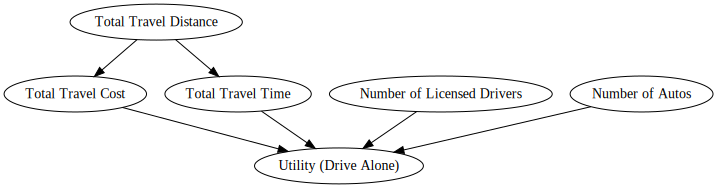

In [15]:
# Define the causal model
V_Drive_Alone = CausalGraphicalModel(nodes=["Total Travel Distance",
                                            "Total Travel Time",
                                            "Total Travel Cost",
                                            "Number of Autos",
                                            "Number of Licensed Drivers",
                                            "Utility (Drive Alone)"],
                                     edges=[("Total Travel Distance","Total Travel Time"),
                                            ("Total Travel Distance","Total Travel Cost"),
                                            ("Total Travel Time", "Utility (Drive Alone)"), 
                                            ("Total Travel Cost", "Utility (Drive Alone)"), 
                                            ("Number of Autos", "Utility (Drive Alone)"),
                                            ("Number of Licensed Drivers","Utility (Drive Alone)")
    ]
)

# draw the causal model
V_Drive_Alone.draw()

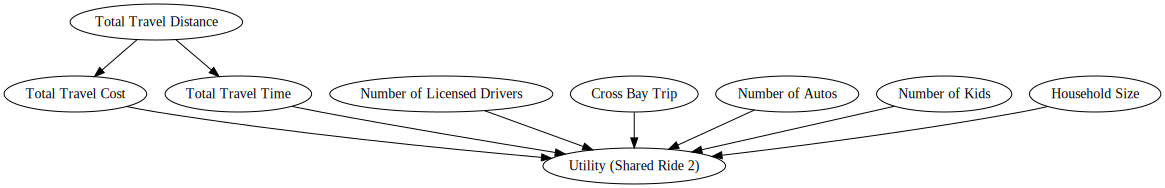

In [16]:
# Define the causal model
V_Shared_2 = CausalGraphicalModel(nodes=["Total Travel Time",
                                         "Total Travel Distance",
                                         "Total Travel Cost",
                                         "Cross Bay Trip",
                                         "Number of Autos",
                                         "Number of Licensed Drivers",
                                         "Household Size",
                                         "Number of Kids",
                                         "Utility (Shared Ride 2)"],
                                  edges=[("Total Travel Distance","Total Travel Time"),
                                         ("Total Travel Distance","Total Travel Cost"),
                                         ("Total Travel Time", "Utility (Shared Ride 2)"),
                                         ("Number of Autos", "Utility (Shared Ride 2)"),
                                         ("Number of Licensed Drivers", "Utility (Shared Ride 2)"),
                                         ("Total Travel Cost", "Utility (Shared Ride 2)"),
                                         ("Household Size", "Utility (Shared Ride 2)"),
                                         ("Cross Bay Trip", "Utility (Shared Ride 2)"),
                                         ("Number of Kids", "Utility (Shared Ride 2)")
    ]
)

# draw the causal model
V_Shared_2.draw()

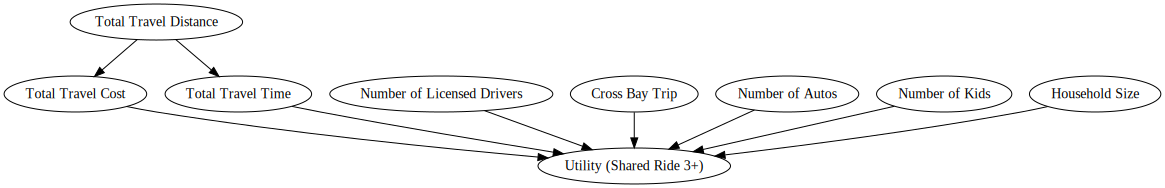

In [17]:
# Define the causal model
V_Shared_3p = CausalGraphicalModel(nodes=["Total Travel Time",
                                         "Total Travel Distance",
                                         "Total Travel Cost",
                                         "Cross Bay Trip",
                                         "Number of Autos",
                                         "Number of Licensed Drivers",
                                         "Household Size",
                                         "Number of Kids",
                                         "Utility (Shared Ride 3+)"],
                                  edges=[("Total Travel Distance","Total Travel Time"),
                                         ("Total Travel Distance","Total Travel Cost"),
                                         ("Total Travel Time", "Utility (Shared Ride 3+)"),
                                         ("Number of Autos", "Utility (Shared Ride 3+)"),
                                         ("Number of Licensed Drivers", "Utility (Shared Ride 3+)"),
                                         ("Total Travel Cost", "Utility (Shared Ride 3+)"),
                                         ("Household Size", "Utility (Shared Ride 3+)"),
                                         ("Cross Bay Trip", "Utility (Shared Ride 3+)"),
                                         ("Number of Kids", "Utility (Shared Ride 3+)")
    ]
)

# draw the causal model
V_Shared_3p.draw()

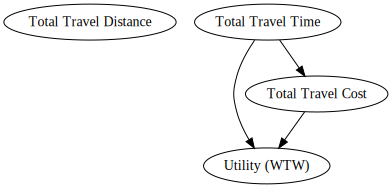

In [18]:
# Define the causal model
V_WTW = CausalGraphicalModel(nodes=["Total Travel Distance",
                                    "Total Travel Time",
                                    "Total Travel Cost",
                                    "Utility (WTW)"],
                                  edges=[("Total Travel Time", "Total Travel Cost"),
                                         ("Total Travel Time", "Utility (WTW)"),
                                         ("Total Travel Cost", "Utility (WTW)")
    ]
)

# draw the causal model
V_WTW.draw()

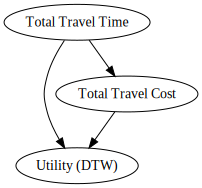

In [19]:
# Define the causal model
V_DTW = CausalGraphicalModel(nodes=["Total Travel Time",
                                         "Total Travel Cost",
                                         "Utility (DTW)"],
                             edges=[("Total Travel Time", "Total Travel Cost"),
                                         ("Total Travel Time", "Utility (DTW)"),
                                         ("Total Travel Cost", "Utility (DTW)")
    ]
)

# draw the causal model
V_DTW.draw()

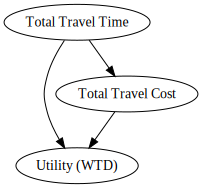

In [20]:
# Define the causal model
V_WTD = CausalGraphicalModel(nodes=["Total Travel Time",
                                    "Total Travel Cost",
                                    "Utility (WTD)"],
                             edges=[("Total Travel Time", "Total Travel Cost"),
                                    ("Total Travel Time", "Utility (WTD)"),
                                    ("Total Travel Cost", "Utility (WTD)")
    ]
)

# draw the causal model
V_WTD.draw()

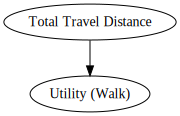

In [21]:
# Define the causal model
V_Walk = CausalGraphicalModel(nodes=["Total Travel Distance",
                                     "Utility (Walk)"],
                              edges=[("Total Travel Distance", "Utility (Walk)")
    ]
)

# draw the causal model
V_Walk.draw()

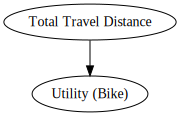

In [22]:
# Define the causal model
V_Bike = CausalGraphicalModel(nodes=["Total Travel Distance",
                                     "Utility (Bike)"],
                              edges=[("Total Travel Distance", "Utility (Bike)")
    ]
)

# draw the causal model
V_Bike.draw()

## 3.2. Distribution of Nodes without parents

### 3.2.1. Set up all needed variables

In [23]:
# Observation id column
observation_id_col = 'observation_id'

# Alternative id column
alternative_id_col = 'mode_id'

# Individual specific variables list
individual_specific_variables = ['household_size','num_kids',
                                'num_cars','num_licensed_drivers']

# Alternative specific variables dictionary
alternative_specific_dict = {1:['total_travel_distance'],
                             2:['total_travel_distance'],
                             3:['total_travel_distance'],
                             4:['total_travel_time'],
                             5:['total_travel_time'],
                             6:['total_travel_time'],
                             7:['total_travel_distance'],
                             8:['total_travel_distance']}

# Trip specific variables list
trip_specific_variables = ['cross_bay']

# Alternative name dictionary
alternative_name_dict = {1: 'drive_alone',
                         2: 'shared_2',
                         3: 'shared_3p',
                         4: 'wtw',
                         5: 'dtw',
                         6: 'wtd',
                         7: 'walk',
                         8: 'bike'}

# Variable type Dictionary
variable_type = {'num_kids': 'categorical',
                 'household_size': 'categorical',
                 'num_cars': 'categorical',
                 'num_licensed_drivers': 'categorical',
                 'cross_bay': 'categorical',
                 'total_travel_time': 'continuous',
                 'total_travel_distance': 'continuous',
                 'total_travel_cost': 'continuous'}

# Distribution to be explored for continuous variables
distributions = ['normal', 'alpha', 'beta', 'gamma', 'expon', 'gumbel']

### 3.2.2. Find Distributions of nodes without parents 

In [24]:
bike_data_params = DistNodeNoParent(data_long=bike_data_long,
                                    alt_id_col=alternative_id_col,
                                    obs_id_col=observation_id_col,
                                    alt_spec_dic=alternative_specific_dict,
                                    alt_name_dic=alternative_name_dict,
                                    ind_spec=individual_specific_variables,
                                    trip_spec=trip_specific_variables,
                                    var_types=variable_type,
                                    cont_dists=distributions)

SKIPPED normal distribution (taking more than 30 seconds)
Fitted alpha distribution with error=0.014522128648725777)
Fitted beta distribution with error=0.0011963782652540424)


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Fitted gamma distribution with error=0.0011394543473683448)
Fitted expon distribution with error=0.002052652669300775)
SKIPPED gumbel distribution (taking more than 30 seconds)
SKIPPED normal distribution (taking more than 30 seconds)
Fitted alpha distribution with error=0.014457810916552023)
Fitted beta distribution with error=0.0012976882508515305)
Fitted gamma distribution with error=0.0012552378475140624)
Fitted expon distribution with error=0.0019967778289294194)
SKIPPED gumbel distribution (taking more than 30 seconds)
SKIPPED normal distribution (taking more than 30 seconds)
Fitted alpha distribution with error=0.014462601227138085)
Fitted beta distribution with error=0.001276124018206852)
Fitted gamma distribution with error=0.0012547975031013958)
Fitted expon distribution with error=0.0020004181046601524)
SKIPPED gumbel distribution (taking more than 30 seconds)
SKIPPED normal distribution (taking more than 30 seconds)
Fitted alpha distribution with error=0.0001078214183544661

In [25]:
bike_data_params

{'household_size': {'distribution': 'categorical',
  'parameters': [array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
   array([0.        , 0.08341658, 0.2465035 , 0.20704296, 0.29220779,
          0.12012987, 0.02997003, 0.00949051, 0.01123876])]},
 'num_kids': {'distribution': 'categorical',
  'parameters': [array([0, 1, 2, 3, 4, 5, 6]),
   array([0.46603397, 0.17682318, 0.25624376, 0.07642358, 0.01598402,
          0.00699301, 0.0014985 ])]},
 'num_cars': {'distribution': 'categorical',
  'parameters': [array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
   array([0.0516983 , 0.23976024, 0.48676324, 0.17057942, 0.03996004,
          0.00674326, 0.0024975 , 0.000999  , 0.000999  ])]},
 'num_licensed_drivers': {'distribution': 'categorical',
  'parameters': [array([0., 1., 2., 3., 4., 5., 6.]),
   array([1.12387612e-02, 1.45604396e-01, 6.15134865e-01, 1.73576424e-01,
          4.47052947e-02, 9.24075924e-03, 4.99500500e-04])]},
 'total_travel_distance_drive_alone': {'distribution': 'gamma',
  'pa

## 3.3. Regressions for each causal graph 

### 3.3.1. Drive Alone 

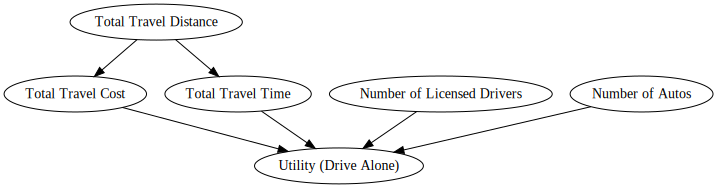

In [26]:
V_Drive_Alone.draw()

In [27]:
Drive_Alone_Df = bike_data_long[bike_data_long['mode_id']==1]
Drive_Alone_Df.reset_index(drop=True,inplace=True)
Drive_Alone_Reg = FitAlternativeRegression(regressions={1:('total_travel_distance','total_travel_cost'),
                                                        2:('total_travel_distance','total_travel_time')},
                                           reg_types={1:'linear',2:'linear'},
                                           data = Drive_Alone_Df)

/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 3.3.2. Shared-2

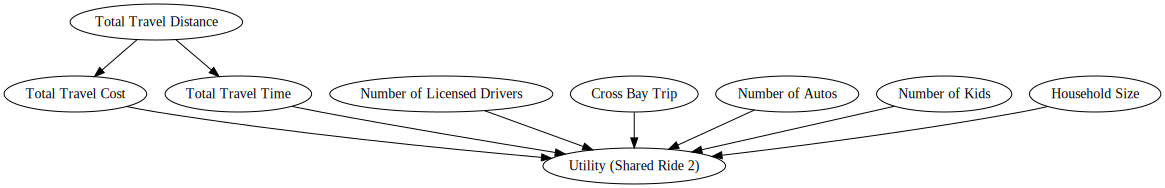

In [28]:
V_Shared_2.draw()

In [29]:
Shared_2_Df = bike_data_long[bike_data_long['mode_id']==2]
Shared_2_Df.reset_index(drop=True,inplace=True)
Shared_2_Reg = FitAlternativeRegression(regressions={1:('total_travel_distance','total_travel_cost'),
                                                        2:('total_travel_distance','total_travel_time')},
                                           reg_types={1:'linear',2:'linear'},
                                           data = Shared_2_Df)

/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 3.3.3. Shared-3+

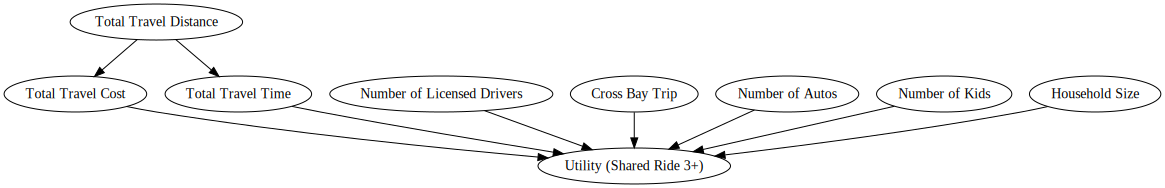

In [30]:
V_Shared_3p.draw()

In [31]:
Shared_3p_Df = bike_data_long[bike_data_long['mode_id']==3]
Shared_3p_Df.reset_index(drop=True,inplace=True)
Shared_3p_Reg = FitAlternativeRegression(regressions={1:('total_travel_distance','total_travel_cost'),
                                                        2:('total_travel_distance','total_travel_time')},
                                           reg_types={1:'linear',2:'linear'},
                                           data = Shared_3p_Df)

/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 3.3.4. Walk-Transit-Walk 

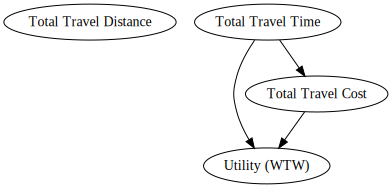

In [32]:
V_WTW.draw()

In [33]:
WTW_Df = bike_data_long[bike_data_long['mode_id']==4]
WTW_Df.reset_index(drop=True,inplace=True)
WTW_Reg = FitAlternativeRegression(regressions={1:('total_travel_time','total_travel_cost')},
                                           reg_types={1:'linear'},
                                           data = WTW_Df)

/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 3.3.5. Drive-Transit-Walk 

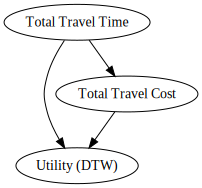

In [34]:
V_DTW.draw()

In [35]:
DTW_Df = bike_data_long[bike_data_long['mode_id']==5]
DTW_Df.reset_index(drop=True,inplace=True)
DTW_Reg = FitAlternativeRegression(regressions={1:('total_travel_time','total_travel_cost')},
                                           reg_types={1:'linear'},
                                           data = DTW_Df)

/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 3.3.6. Walk-Transit-Drive 

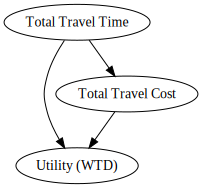

In [36]:
V_WTD.draw()

In [37]:
WTD_Df = bike_data_long[bike_data_long['mode_id']==6]
WTD_Df.reset_index(drop=True,inplace=True)
WTD_Reg = FitAlternativeRegression(regressions={1:('total_travel_time','total_travel_cost')},
                                           reg_types={1:'linear'},
                                           data = WTD_Df)

/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 3.3.7. Walk

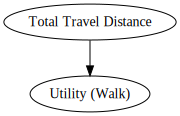

In [38]:
V_Walk.draw()

No regressions needed under the Walk alternative since the travel distance will be simulated based on the original dataset and directly affects the utility function

### 3.3.8. Bike

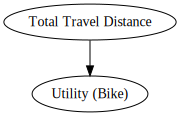

In [39]:
V_Bike.draw()

## 3.4. Simulate Nodes without Parents 

In [40]:
sim_size = 8000
sim_bike_data_no_parent = SimNodeNoParent(bike_data_params, size=sim_size)

## 3.5. Simulate data for each causal graph

In [41]:
# Create a copy of the data to avoid any issues
sim_bike_data_wide = copy.deepcopy(sim_bike_data_no_parent)

### 3.5.1. Drive Alone 

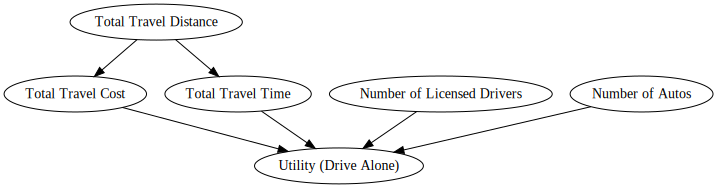

In [42]:
V_Drive_Alone.draw()

In [43]:
sim_bike_data_wide['total_travel_time_drive_alone'] = Drive_Alone_Reg['total_travel_time_on_total_travel_distance'].params[0] +\
                                                  Drive_Alone_Reg['total_travel_time_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_drive_alone'] +\
                                                  np.random.normal(loc=0,
                                                                   scale = Drive_Alone_Reg['total_travel_time_on_total_travel_distance'].resid.std(),
                                                                   size = sim_size)
sim_bike_data_wide['total_travel_cost_drive_alone'] = Drive_Alone_Reg['total_travel_cost_on_total_travel_distance'].params[0] +\
                                                  Drive_Alone_Reg['total_travel_cost_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_drive_alone'] +\
                                                  np.random.normal(loc=0,
                                                                   scale = Drive_Alone_Reg['total_travel_cost_on_total_travel_distance'].resid.std(),
                                                                   size = sim_size)

In [44]:
# ## Loading data into StructuralCausalModel
# Drive_Alone_Model = StructuralCausalModel({
#     "total_travel_distance": lambda   n_samples: bike_data_no_parent['total_travel_distance_drive_alone'],
#     "total_travel_time": lambda total_travel_distance, n_samples: Drive_Alone_Reg['total_travel_time_on_total_travel_distance'].params[0] + 
#                                                                   Drive_Alone_Reg['total_travel_time_on_total_travel_distance'].params[1] * 
#                                                                   bike_data_no_parent['total_travel_distance_drive_alone'] + 
#                                                                   np.random.normal(loc=0,
#                                                                                    scale = Drive_Alone_Reg['total_travel_time_on_total_travel_distance'].resid.std(),
#                                                                                    size = n_samples),
#     "total_travel_cost": lambda total_travel_distance, n_samples: Drive_Alone_Reg['total_travel_cost_on_total_travel_distance'].params[0] + 
#                                                                   Drive_Alone_Reg['total_travel_cost_on_total_travel_distance'].params[1] * 
#                                                                   bike_data_no_parent['total_travel_distance_drive_alone'] + 
#                                                                   np.random.normal(loc=0,
#                                                                                    scale = Drive_Alone_Reg['total_travel_cost_on_total_travel_distance'].resid.std(),
#                                                                                    size = n_samples),
#     "num_licensed_drivers": lambda n_samples: bike_data_no_parent['num_licensed_drivers'],
#     "num_cars": lambda n_samples: bike_data_no_parent['num_cars'],
#     "utility_drive_alone": lambda n_samples: np.zeros(shape=n_samples)
# })

# Drive_Alone_Model.sample(n_samples=4000).head()

### 3.5.2. Shared-2 

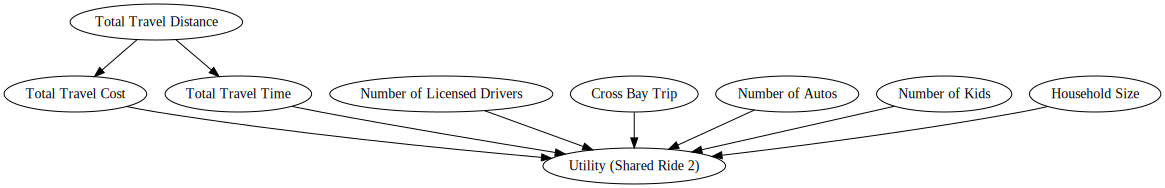

In [45]:
V_Shared_2.draw()

In [46]:
sim_bike_data_wide['total_travel_time_shared_2'] = Shared_2_Reg['total_travel_time_on_total_travel_distance'].params[0] +\
                                               Shared_2_Reg['total_travel_time_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_shared_2'] +\
                                                  np.random.normal(loc=0,
                                                                   scale = Shared_2_Reg['total_travel_time_on_total_travel_distance'].resid.std(),
                                                                   size = sim_size)
sim_bike_data_wide['total_travel_cost_shared_2'] = Shared_2_Reg['total_travel_cost_on_total_travel_distance'].params[0] +\
                                                  Shared_2_Reg['total_travel_cost_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_shared_2'] +\
                                                  np.random.normal(loc=0,
                                                                   scale = Shared_2_Reg['total_travel_cost_on_total_travel_distance'].resid.std(),
                                                                   size = sim_size)

In [47]:
# ## Loading data into StructuralCausalModel
# Shared_2_Model = StructuralCausalModel({
#     "total_travel_distance": lambda   n_samples: bike_data_no_parent['total_travel_distance_shared_2'],
#     "total_travel_time": lambda total_travel_distance, n_samples: Shared_2_Reg['total_travel_time_on_total_travel_distance'].params[0] + 
#                                                                   Shared_2_Reg['total_travel_time_on_total_travel_distance'].params[1] * 
#                                                                   bike_data_no_parent['total_travel_distance_drive_alone'] + 
#                                                                   np.random.normal(loc=0,
#                                                                                    scale = Shared_2_Reg['total_travel_time_on_total_travel_distance'].resid.std(),
#                                                                                    size = n_samples),
#     "total_travel_cost": lambda total_travel_distance, n_samples: Shared_2_Reg['total_travel_cost_on_total_travel_distance'].params[0] + 
#                                                                   Shared_2_Reg['total_travel_cost_on_total_travel_distance'].params[1] * 
#                                                                   bike_data_no_parent['total_travel_distance_drive_alone'] + 
#                                                                   np.random.normal(loc=0,
#                                                                                    scale = Shared_2_Reg['total_travel_cost_on_total_travel_distance'].resid.std(),
#                                                                                    size = n_samples),
#     "household_size": lambda n_samples: bike_data_no_parent['household_size'],
#     "num_kids": lambda n_samples: bike_data_no_parent['num_kids'],
#     "num_licensed_drivers": lambda n_samples: bike_data_no_parent['num_licensed_drivers'],
#     "num_cars": lambda n_samples: bike_data_no_parent['num_cars'],
#     "cross_bay": lambda n_samples: bike_data_no_parent['cross_bay'],
#     "utility_shared_2": total_travel_cost: lambda n_samples: np.zeros(shape=bike_data_no_parent['total_travel_distance_shared_2'].shape[0])
# })
# Shared_2_Model.sample(n_samples=4000).head()

### 3.5.3. Shared-3+

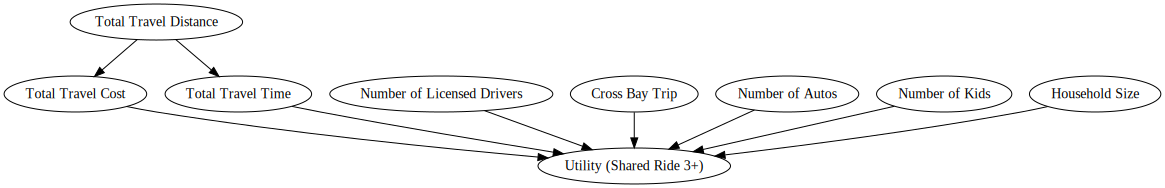

In [48]:
V_Shared_3p.draw()

In [49]:
sim_bike_data_wide['total_travel_time_shared_3p'] = Shared_3p_Reg['total_travel_time_on_total_travel_distance'].params[0] +\
                                               Shared_3p_Reg['total_travel_time_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_shared_3p'] +\
                                                  np.random.normal(loc=0,
                                                                   scale = Shared_3p_Reg['total_travel_time_on_total_travel_distance'].resid.std(),
                                                                   size = sim_size)
sim_bike_data_wide['total_travel_cost_shared_3p'] = Shared_3p_Reg['total_travel_cost_on_total_travel_distance'].params[0] +\
                                                  Shared_3p_Reg['total_travel_cost_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_shared_3p'] +\
                                                  np.random.normal(loc=0,
                                                                   scale = Shared_3p_Reg['total_travel_cost_on_total_travel_distance'].resid.std(),
                                                                   size = sim_size)

In [50]:
# ## Loading data into StructuralCausalModel
# Shared_3p_Model = StructuralCausalModel({
#     "total_travel_distance": lambda   n_samples: bike_data_no_parent['total_travel_distance_shared_3p'],
#     "total_travel_time": lambda total_travel_distance, n_samples: Shared_3p_Reg['total_travel_time_on_total_travel_distance'].params[0] + 
#                                                                   Shared_3p_Reg['total_travel_time_on_total_travel_distance'].params[1] * 
#                                                                   bike_data_no_parent['total_travel_distance_drive_alone'] + 
#                                                                   np.random.normal(loc=0,
#                                                                                    scale = Shared_3p_Reg['total_travel_time_on_total_travel_distance'].resid.std(),
#                                                                                    size = n_samples),
#     "total_travel_cost": lambda total_travel_distance, n_samples: Shared_3p_Reg['total_travel_cost_on_total_travel_distance'].params[0] + 
#                                                                   Shared_3p_Reg['total_travel_cost_on_total_travel_distance'].params[1] * 
#                                                                   bike_data_no_parent['total_travel_distance_drive_alone'] + 
#                                                                   np.random.normal(loc=0,
#                                                                                    scale = Shared_3p_Reg['total_travel_cost_on_total_travel_distance'].resid.std(),
#                                                                                    size = n_samples),
#     "household_size": lambda n_samples: bike_data_no_parent['household_size'],
#     "num_kids": lambda n_samples: bike_data_no_parent['num_kids'],
#     "num_licensed_drivers": lambda n_samples: bike_data_no_parent['num_licensed_drivers'],
#     "num_cars": lambda n_samples: bike_data_no_parent['num_cars'],
#     "cross_bay": lambda n_samples: bike_data_no_parent['cross_bay'],
#     "utility_shared_3+": lambda n_samples: np.zeros(shape=n_samples)
# })

### 3.5.4. Walk-Transit-Walk

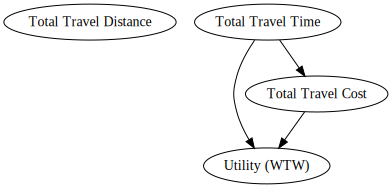

In [51]:
V_WTW.draw()

In [52]:
sim_bike_data_wide['total_travel_cost_wtw'] = WTW_Reg['total_travel_cost_on_total_travel_time'].params[0] +\
                                                  WTW_Reg['total_travel_cost_on_total_travel_time'].params[1] *\
                                                  sim_bike_data_wide['total_travel_time_wtw'] +\
                                                  np.random.normal(loc=0,
                                                                   scale = WTW_Reg['total_travel_cost_on_total_travel_time'].resid.std(),
                                                                   size = sim_size)

### 3.5.5. Drive-Transit-Walk

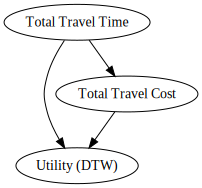

In [53]:
V_DTW.draw()

In [54]:
sim_bike_data_wide['total_travel_cost_dtw'] = DTW_Reg['total_travel_cost_on_total_travel_time'].params[0] +\
                                                  DTW_Reg['total_travel_cost_on_total_travel_time'].params[1] *\
                                                  sim_bike_data_wide['total_travel_time_dtw'] +\
                                                  np.random.normal(loc=0,
                                                                   scale = DTW_Reg['total_travel_cost_on_total_travel_time'].resid.std(),
                                                                   size = sim_size)

### 3.5.6. Walk-Transit-Drive

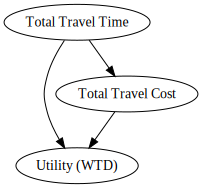

In [55]:
V_WTD.draw()

In [56]:
sim_bike_data_wide['total_travel_cost_wtd'] = WTD_Reg['total_travel_cost_on_total_travel_time'].params[0] +\
                                                  WTD_Reg['total_travel_cost_on_total_travel_time'].params[1] *\
                                                  sim_bike_data_wide['total_travel_time_wtd'] +\
                                                  np.random.normal(loc=0,
                                                                   scale = WTD_Reg['total_travel_cost_on_total_travel_time'].resid.std(),
                                                                   size = sim_size)

### 3.5.7. Walk

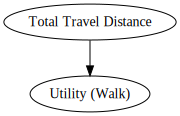

In [57]:
V_Walk.draw()

No need to simulate any other variables since Walk Total Travel Distance was already simulated

### 3.5.8. Bike

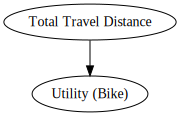

In [58]:
V_Bike.draw()

No need to simulate any other variables since Bike Total Travel Distance was already simulated

## 3.6. Simulate Availability of Alternatives 

In [59]:
# Simulate availability, add fake choice column
# and return final simulated data with availability
# and choices
wide_sim_data_availability = SimulateAvailability(data_long=bike_data_long,
                                     sim_data=sim_bike_data_wide,
                                     obs_id_col=observation_id_col,
                                     alt_name_dict=alternative_name_dict)

## 3.7. Convert Simulated Data from Wide to Long

In [60]:
ind_variables = ['num_kids', 'household_size',
                 'num_cars', 'num_licensed_drivers', 'cross_bay']



# Dictionary of Alternative Specific Variables
# TODO: verify whether all variables are needed
# for each alternative
alt_varying_variables = {u'total_travel_time': dict([(1, 'total_travel_time_drive_alone'),
                                                     (2, 'total_travel_time_shared_2'),
                                                     (3, 'total_travel_time_shared_3p'),
                                                     (4, 'total_travel_time_wtw'),
                                                     (5, 'total_travel_time_dtw'),
                                                     (6, 'total_travel_time_wtd')]),
                         u'total_travel_cost': dict([(1, 'total_travel_cost_drive_alone'),
                                                     (2, 'total_travel_cost_shared_2'),
                                                     (3, 'total_travel_cost_shared_3p'),
                                                     (4, 'total_travel_cost_wtw'),
                                                     (5, 'total_travel_cost_dtw'),
                                                     (6, 'total_travel_cost_wtd')]),
                         u'total_travel_distance': dict([(1, 'total_travel_distance_drive_alone'),
                                                         (2, 'total_travel_distance_shared_2'),
                                                         (3, 'total_travel_distance_shared_3p'),
                                                         (7, 'total_travel_distance_walk'),
                                                         (8, 'total_travel_distance_bike')]),
                            }


# Dictionary of alternative availability variables
availability_variables = {1: 'drive_alone_AV',
                          2: 'shared_2_AV',
                          3: 'shared_3p_AV',
                          4: 'wtw_AV',
                          5: 'dtw_AV',
                          6: 'wtd_AV',
                          7: 'walk_AV',
                          8: 'bike_AV'}

##########
# Determine the columns for: alternative ids, the observation ids and the choice
##########
# The 'custom_alt_id' is the name of a column to be created in the long-format data
# It will identify the alternative associated with each row.
custom_alt_id = "mode_id"

# Create a custom id column that ignores the fact that this is a
# panel/repeated-observations dataset. Note the +1 ensures the id's start at one.
obs_id_column = "observation_id"
wide_sim_data_availability[obs_id_column] = np.arange(wide_sim_data_availability.shape[0],
                                         dtype=int) + 1


# Declare choice column
choice_column = "sim_choice"

In [61]:
# Convert data from wide to long
long_sim_data = pl.convert_wide_to_long(wide_sim_data_availability,
                                        ind_variables,
                                        alt_varying_variables,
                                        availability_variables,
                                        obs_id_column,
                                        choice_column,
                                        new_alt_id_name=custom_alt_id)

In [62]:
# Create a cars per licensed drivers column
long_sim_data["cars_per_licensed_drivers"] = 0
long_sim_data.loc[long_sim_data.num_licensed_drivers > 0,
                  "cars_per_licensed_drivers"] = long_sim_data.num_cars / long_sim_data.num_licensed_drivers.astype(float)

In [63]:
# Add a variable representing cost divided by distance
long_sim_data["cost_per_distance"] = 0
long_sim_data.loc[long_sim_data.mode_id.isin([1, 2, 3]),
                  "cost_per_distance"] = (long_sim_data.loc[long_sim_data.mode_id.isin([1, 2, 3]),
                                                            "total_travel_cost"] /
                                          long_sim_data.loc[long_sim_data.mode_id.isin([1, 2, 3]),
                                                            "total_travel_distance"])

## 3.8. Simulate Choices 

In [64]:
# Calculate probabilities for each alternative
# based on the estimated model
posterior_probs = mnl_model.predict(long_sim_data)

/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))


In [65]:
# Simulate choice data
long_sim_data['sim_choice'] = viz.simulate_choice_vector(posterior_probs,
                               long_sim_data['observation_id'].values)

## 3.9. Estimate Model

In [66]:
# Estimate the basic MNL model, using the hessian and newton-conjugate gradient
mnl_model_sim = pl.create_choice_model(data=long_sim_data,
                                           alt_id_col=alternative_id_col,
                                           obs_id_col=observation_id_col,
                                           choice_col=choice_column,
                                           specification=mnl_specification,
                                           model_type="MNL",
                                           names=mnl_names)

num_vars = len(reduce(lambda x, y: x + y, mnl_names.values()))

# Note newton-cg used to ensure convergence to a point where gradient 
# is essentially zero for all dimensions. 
mnl_model_sim.fit_mle(np.zeros(num_vars),
                      method="BFGS")

# Look at the estimation results
mnl_model_sim.get_statsmodels_summary()

Log-likelihood at zero: -15,202.8663
Initial Log-likelihood: -15,202.8663


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.44 seconds.
Final log-likelihood: -5,738.1350


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                  sim_choice   No. Observations:                8,000
Model:             Multinomial Logit Model   Df Residuals:                    7,981
Method:                                MLE   Df Model:                           19
Date:                     Sat, 28 Mar 2020   Pseudo R-squ.:                   0.623
Time:                             11:24:39   Pseudo R-bar-squ.:               0.621
AIC:                            11,514.270   Log-Likelihood:             -5,738.135
BIC:                            11,647.027   LL-Null:                   -15,202.866
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
ASC Shared Ride: 2                                      -0.9238      0.129     -7.155      0.000      -1.177      -0.671
ASC Shared Ride: 3+                                      3.5857      0.201     17.804      0.000       3.191       3.980
ASC Walk-Transit-Walk                                   -0.4172      0.138     -3.020      0.003      -0.688      -0.146
ASC Drive-Transit-Walk                                  -2.5357      0.143    -17.693      0.000      -2.817      -2.255
ASC Walk-Transit-Drive                                  -3.0301      0.153    -19.754      0.000      -3.331      -2.729
ASC Walk                                                 1.5918      0.138     11.493      0.000       1.320       1.863
ASC Bike                                                -0.9374      0.114     -8.248      0.000      -1.160      -0.715
Travel Time, units:min (All Auto Modes)                 -0.0727      0.002    -32.741      0.000      -0.077      -0.068
Travel Time, units:min (All Transit Modes)              -0.0267      0.001    -18.924      0.000      -0.029      -0.024
Travel Cost, units:$ (All Transit Modes)                -0.1120      0.019     -5.921      0.000      -0.149      -0.075
Travel Cost per Distance, units:$/mi (Drive Alone)      -5.0320      0.189    -26.585      0.000      -5.403      -4.661
Travel Cost per Distance, units:$/mi (SharedRide-2)    -20.4558      0.627    -32.641      0.000     -21.684     -19.228
Travel Cost per Distance, units:$/mi (SharedRide-3+)   -93.2597      2.730    -34.167      0.000     -98.609     -87.910
Autos per licensed drivers (All Auto Modes)              1.1886      0.060     19.935      0.000       1.072       1.305
Travel Distance, units:mi (Walk)                        -1.0191      0.035    -28.806      0.000      -1.088      -0.950
Travel Distance, units:mi (Bike)                        -0.3072      0.016    -19.779      0.000      -0.338      -0.277
Cross-Bay Tour (Shared Ride 2 & 3+)                      0.9346      0.154      6.062      0.000       0.632       1.237
Household Size (Shared Ride 2 & 3+)                      0.1049      0.028      3.724      0.000       0.050       0.160
Number of Kids in Household (Shared Ride 2 & 3+)         0.6565      0.034     19.096      0.000       0.589       0.724
========================================================================================================================
"""

# 4. Simulate and Estimate N Times

In [ ]:
simulation_sizes = np.random.randint(low=3000, high=9000, size=100)
sim_number = np.arange(1,101)
models_dictionary = defaultdict(dict)

for sim_size, number in zip(simulation_sizes, sim_number):
    print('Simulation number', number , 'is in progress...')
    print ('Simulation size is', sim_size)
    print('------------------------------------------')
    print('Simulating data...')
    # Simulate data without parents
    sim_bike_data_no_parent = SimNodeNoParent(bike_data_params, size=sim_size)
    
    sim_bike_data_wide = copy.deepcopy(sim_bike_data_no_parent)

    # Simulate nodes based on causal graphs
    # Drive Alone
    sim_bike_data_wide['total_travel_time_drive_alone'] = Drive_Alone_Reg['total_travel_time_on_total_travel_distance'].params[0] +\
                                                  Drive_Alone_Reg['total_travel_time_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_drive_alone'] +\
                                                  np.random.normal(loc=0,
                                                                   scale=Drive_Alone_Reg['total_travel_time_on_total_travel_distance'].resid.std(),
                                                                   size=sim_size)
    sim_bike_data_wide['total_travel_cost_drive_alone'] = Drive_Alone_Reg['total_travel_cost_on_total_travel_distance'].params[0] +\
                                                  Drive_Alone_Reg['total_travel_cost_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_drive_alone'] +\
                                                  np.random.normal(loc=0,
                                                                   scale=Drive_Alone_Reg['total_travel_cost_on_total_travel_distance'].resid.std(),
                                                                   size=sim_size)
    
    # Shared Ride 2
    sim_bike_data_wide['total_travel_time_shared_2'] = Shared_2_Reg['total_travel_time_on_total_travel_distance'].params[0] +\
                                               Shared_2_Reg['total_travel_time_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_shared_2'] +\
                                                  np.random.normal(loc=0,
                                                                   scale=Shared_2_Reg['total_travel_time_on_total_travel_distance'].resid.std(),
                                                                   size=sim_size)
    sim_bike_data_wide['total_travel_cost_shared_2'] = Shared_2_Reg['total_travel_cost_on_total_travel_distance'].params[0] +\
                                                  Shared_2_Reg['total_travel_cost_on_total_travel_distance'].params[1] *\
                                                  sim_bike_data_wide['total_travel_distance_shared_2'] +\
                                                  np.random.normal(loc=0,
                                                                   scale=Shared_2_Reg['total_travel_cost_on_total_travel_distance'].resid.std(),
                                                                   size=sim_size)
    # Shared Ride 3+
    sim_bike_data_wide['total_travel_time_shared_3p'] = Shared_3p_Reg['total_travel_time_on_total_travel_distance'].params[0] +\
                                                   Shared_3p_Reg['total_travel_time_on_total_travel_distance'].params[1] *\
                                                      sim_bike_data_wide['total_travel_distance_shared_3p'] +\
                                                      np.random.normal(loc=0,
                                                                       scale=Shared_3p_Reg['total_travel_time_on_total_travel_distance'].resid.std(),
                                                                       size=sim_size)
    sim_bike_data_wide['total_travel_cost_shared_3p'] = Shared_3p_Reg['total_travel_cost_on_total_travel_distance'].params[0] +\
                                                      Shared_3p_Reg['total_travel_cost_on_total_travel_distance'].params[1] *\
                                                      sim_bike_data_wide['total_travel_distance_shared_3p'] +\
                                                      np.random.normal(loc=0,
                                                                       scale=Shared_3p_Reg['total_travel_cost_on_total_travel_distance'].resid.std(),
                                                                       size=sim_size)
    # Walk-Transit-Walk
    sim_bike_data_wide['total_travel_cost_wtw'] = WTW_Reg['total_travel_cost_on_total_travel_time'].params[0] +\
                                                  WTW_Reg['total_travel_cost_on_total_travel_time'].params[1] *\
                                                  sim_bike_data_wide['total_travel_time_wtw'] +\
                                                  np.random.normal(loc=0,
                                                                   scale=WTW_Reg['total_travel_cost_on_total_travel_time'].resid.std(),
                                                                   size=sim_size)
    # Drive-Transit-Walk
    sim_bike_data_wide['total_travel_cost_dtw'] = DTW_Reg['total_travel_cost_on_total_travel_time'].params[0] +\
                                                  DTW_Reg['total_travel_cost_on_total_travel_time'].params[1] *\
                                                  sim_bike_data_wide['total_travel_time_dtw'] +\
                                                  np.random.normal(loc=0,
                                                                   scale =DTW_Reg['total_travel_cost_on_total_travel_time'].resid.std(),
                                                                   size =sim_size)
    # Walk-Transit-Drive
    sim_bike_data_wide['total_travel_cost_wtd'] = WTD_Reg['total_travel_cost_on_total_travel_time'].params[0] +\
                                                  WTD_Reg['total_travel_cost_on_total_travel_time'].params[1] *\
                                                  sim_bike_data_wide['total_travel_time_wtd'] +\
                                                  np.random.normal(loc=0,
                                                                   scale =WTD_Reg['total_travel_cost_on_total_travel_time'].resid.std(),
                                                                   size =sim_size)
    
    #Simulate Availability
    print('Simulating Availability...')
    wide_sim_data_availability = SimulateAvailability(data_long=bike_data_long,
                                         sim_data=sim_bike_data_wide,
                                         obs_id_col=observation_id_col,
                                         alt_name_dict=alternative_name_dict)

    wide_sim_data_availability[obs_id_column] = np.arange(wide_sim_data_availability.shape[0],
                                            dtype=int) + 1
    
    print('Converting data from wide to long...')
    long_sim_data = pl.convert_wide_to_long(wide_sim_data_availability,
                                        ind_variables,
                                        alt_varying_variables,
                                        availability_variables,
                                        obs_id_column,
                                        choice_column,
                                        new_alt_id_name=custom_alt_id)
    
    # Create a cars per licensed drivers column
    long_sim_data["cars_per_licensed_drivers"] = 0
    long_sim_data.loc[long_sim_data.num_licensed_drivers > 0,
                      "cars_per_licensed_drivers"] = long_sim_data.num_cars / long_sim_data.num_licensed_drivers.astype(float)

    # Add a variable representing cost divided by distance
    long_sim_data["cost_per_distance"] = 0
    long_sim_data.loc[long_sim_data.mode_id.isin([1, 2, 3]),
                      "cost_per_distance"] = (long_sim_data.loc[long_sim_data.mode_id.isin([1, 2, 3]),
                                                                "total_travel_cost"] /
                                              long_sim_data.loc[long_sim_data.mode_id.isin([1, 2, 3]),
                                                        "total_travel_distance"])
    print('Simulating Choices...')
    # Calculate probabilities for each alternative
    # based on the estimated model
    posterior_probs = mnl_model.predict(long_sim_data)
    
    
    # Simulate choice data
    long_sim_data['sim_choice'] = viz.simulate_choice_vector(posterior_probs,
                               long_sim_data['observation_id'].values)
    
    
    print('Estimating the choice model...')
    # Estimate the basic MNL model, using the hessian and newton-conjugate gradient
    mnl_model_sim = pl.create_choice_model(data=long_sim_data,
                                           alt_id_col=alternative_id_col,
                                           obs_id_col=observation_id_col,
                                           choice_col=choice_column,
                                           specification=mnl_specification,
                                           model_type="MNL",
                                           names=mnl_names)

    num_vars = len(reduce(lambda x, y: x + y, mnl_names.values()))
    # Note newton-cg used to ensure convergence to a point where gradient 
    # is essentially zero for all dimensions. 
    mnl_model_sim.fit_mle(np.zeros(num_vars),
                          method="BFGS")
    
    mnl_model_sim.coefs.name = 'simulation_' + str(number)

    models_dictionary[number] = mnl_model_sim
    
    print('Simulation number', number , 'is complete!')
    print('==========================================')
    print('==========================================')

Simulation number 1 is in progress...
Simulation size is 8093
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -15,336.4842
Initial Log-likelihood: -15,336.4842


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 1.21 seconds.
Final log-likelihood: -5,588.2064
Simulation number 1 is complete!
Simulation number 2 is in progress...
Simulation size is 8694
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -16,521.9656
Initial Log-likelihood: -16,521.9656


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.49 seconds.
Final log-likelihood: -6,142.3422
Simulation number 2 is complete!
Simulation number 3 is in progress...
Simulation size is 6297
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -11,952.7898
Initial Log-likelihood: -11,952.7898


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.36 seconds.
Final log-likelihood: -4,402.5490
Simulation number 3 is complete!
Simulation number 4 is in progress...
Simulation size is 8771
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -16,601.6446
Initial Log-likelihood: -16,601.6446


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.46 seconds.
Final log-likelihood: -6,208.3762
Simulation number 4 is complete!
Simulation number 5 is in progress...
Simulation size is 6004
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -11,400.7269
Initial Log-likelihood: -11,400.7269


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.40 seconds.
Final log-likelihood: -4,195.8736
Simulation number 5 is complete!
Simulation number 6 is in progress...
Simulation size is 7050
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -13,382.1113
Initial Log-likelihood: -13,382.1113


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.41 seconds.
Final log-likelihood: -4,957.9219
Simulation number 6 is complete!
Simulation number 7 is in progress...
Simulation size is 5281
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -10,015.4882
Initial Log-likelihood: -10,015.4882


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.41 seconds.
Final log-likelihood: -3,738.4414
Simulation number 7 is complete!
Simulation number 8 is in progress...
Simulation size is 8274
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -15,685.2316
Initial Log-likelihood: -15,685.2316


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.43 seconds.
Final log-likelihood: -5,968.8633
Simulation number 8 is complete!
Simulation number 9 is in progress...
Simulation size is 6632
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -12,613.5338
Initial Log-likelihood: -12,613.5338


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.40 seconds.
Final log-likelihood: -4,784.9026
Simulation number 9 is complete!
Simulation number 10 is in progress...
Simulation size is 6471
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -12,293.6348
Initial Log-likelihood: -12,293.6348


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.39 seconds.
Final log-likelihood: -4,532.0497
Simulation number 10 is complete!
Simulation number 11 is in progress...
Simulation size is 8185
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -15,549.1827
Initial Log-likelihood: -15,549.1827


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.46 seconds.
Final log-likelihood: -5,790.4244
Simulation number 11 is complete!
Simulation number 12 is in progress...
Simulation size is 3790
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -7,149.2854
Initial Log-likelihood: -7,149.2854


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.21 seconds.
Final log-likelihood: -2,676.0668
Simulation number 12 is complete!
Simulation number 13 is in progress...
Simulation size is 4111
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -7,793.3725
Initial Log-likelihood: -7,793.3725


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.36 seconds.
Final log-likelihood: -2,919.3277
Simulation number 13 is complete!
Simulation number 14 is in progress...
Simulation size is 8966
------------------------------------------
Simulating data...
Simulating Availability...
Converting data from wide to long...
Simulating Choices...


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))



Estimating the choice model...
Log-likelihood at zero: -17,039.2050
Initial Log-likelihood: -17,039.2050


/Users/mobouzaghrane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.53 seconds.
Final log-likelihood: -6,289.8415


# 5. Plotting results of the simulation 

In [1]:
df = pd.concat([models_dictionary[number].coefs for number in models_dictionary.keys()], axis=1).T
df.reset_index(drop=True,inplace=True)

NameError: name 'pd' is not defined

In [210]:
def Plot(sim_par, model, size):
    bins = np.linspace(sim_par.min(), sim_par.max(), 10)
    plt.figure(figsize=size)
    sns.distplot(sim_par, kde=False, bins=bins, label='Simulated Parameters')
    plt.axvline(model.coefs[sim_par.name], color='black', ls='--',label='Data Generating Parameter')
    plt.title(label='Histogram of '+'"'+sim_par.name+'"', fontdict={'fontsize':16})
    plt.ylabel('Frequency', rotation=0, labelpad=50)
    plt.legend()

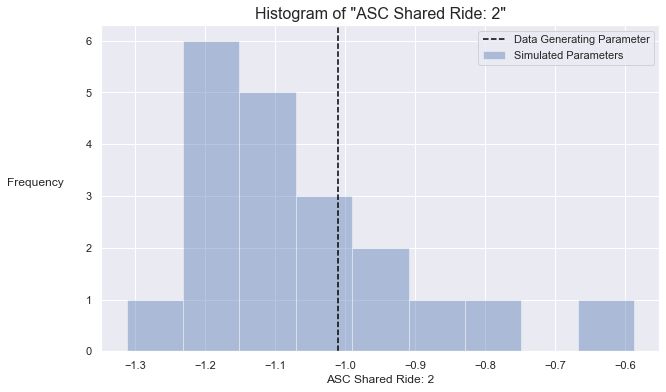

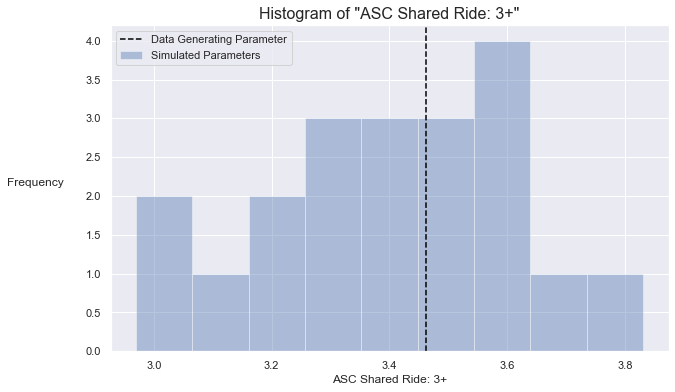

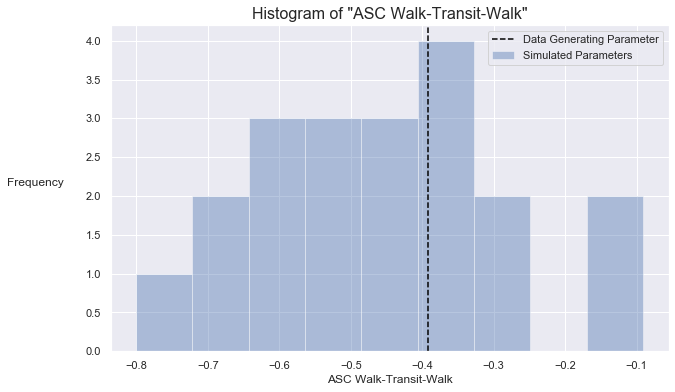

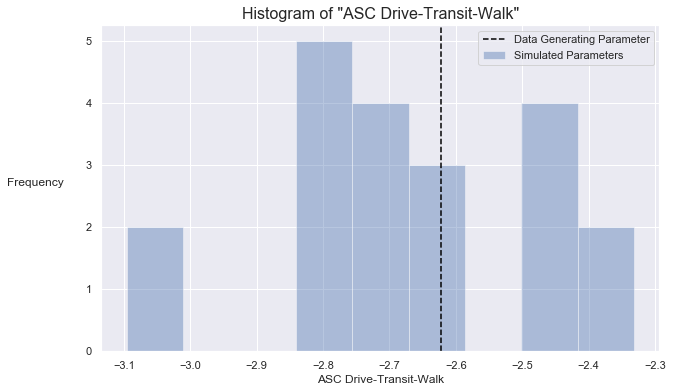

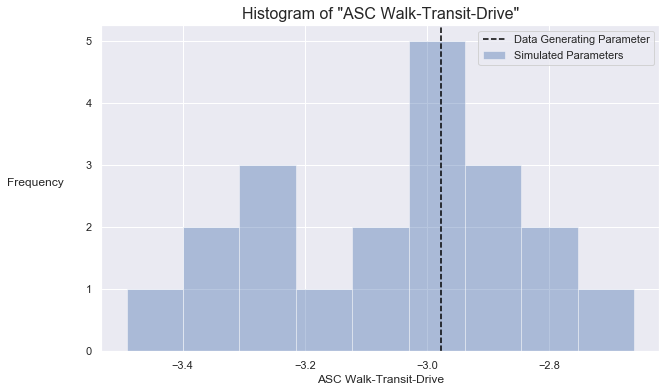

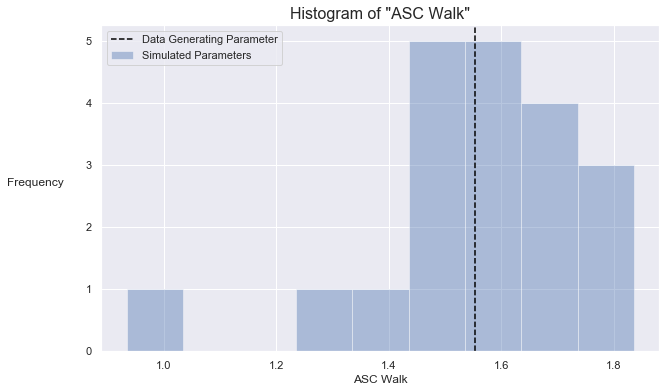

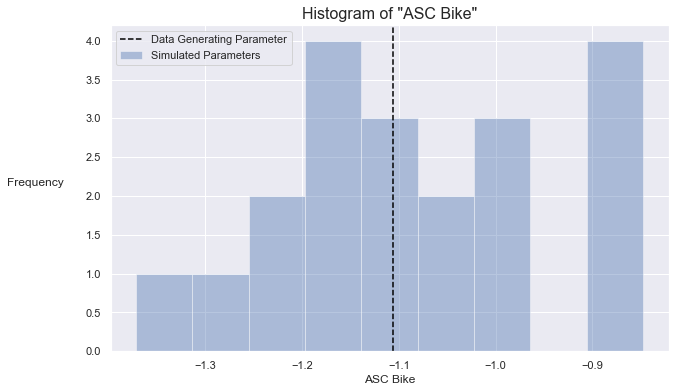

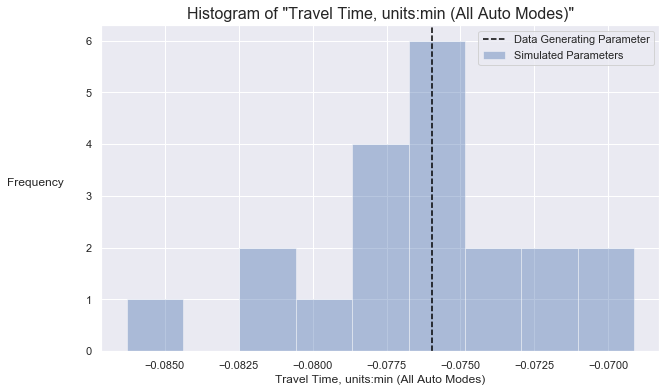

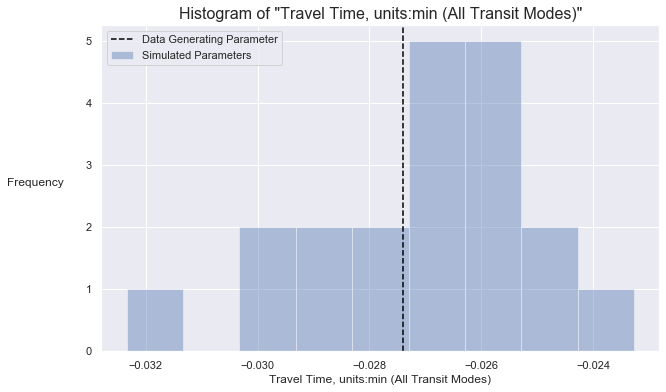

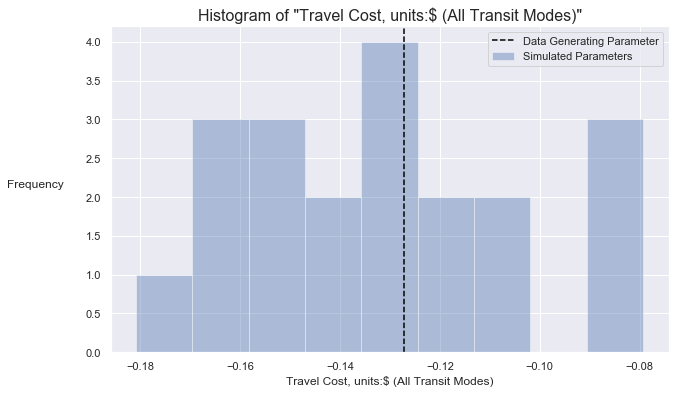

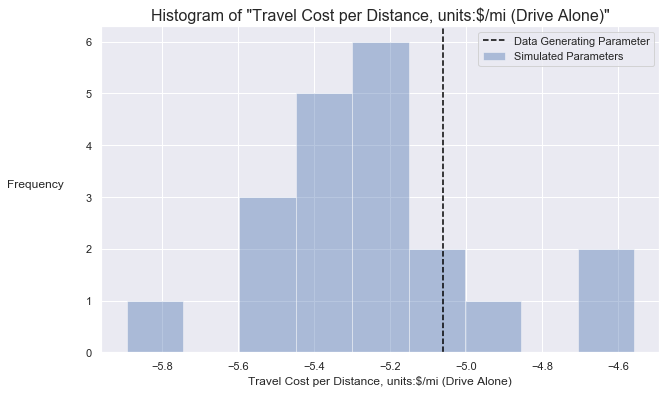

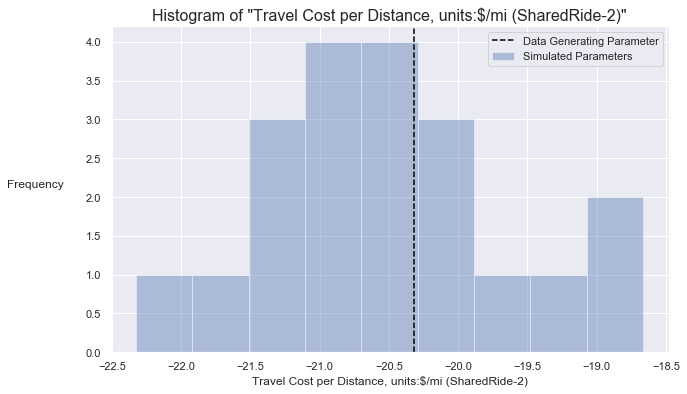

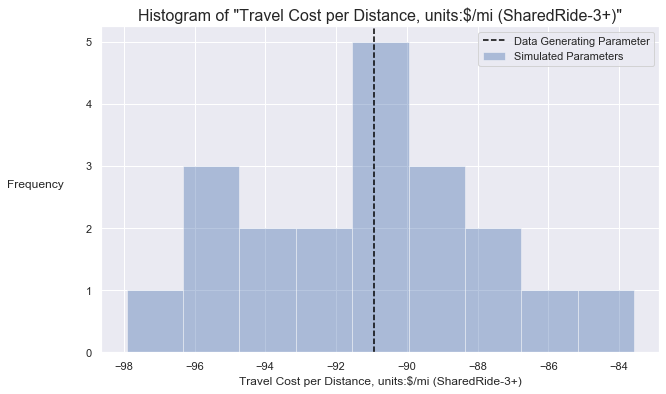

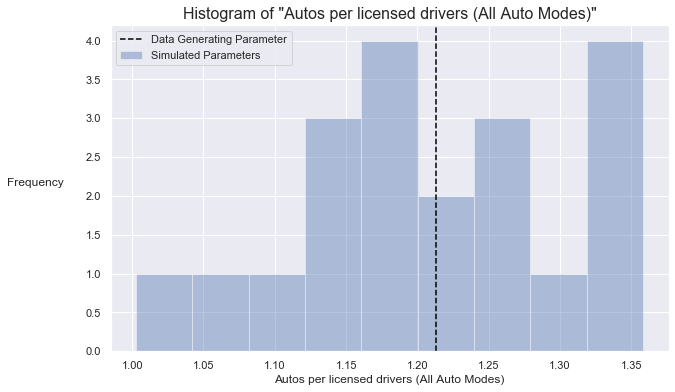

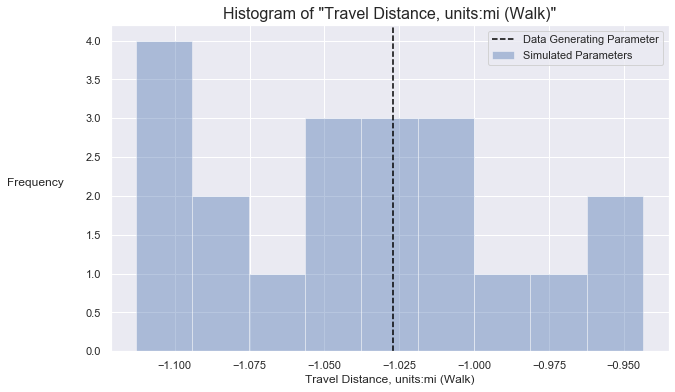

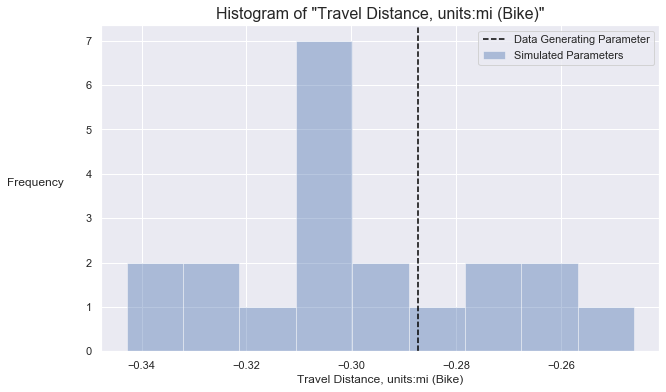

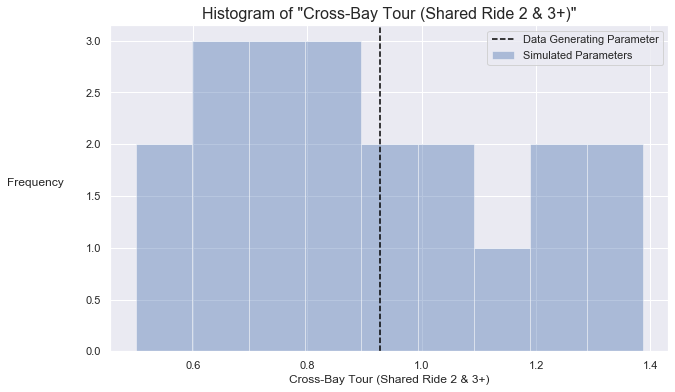

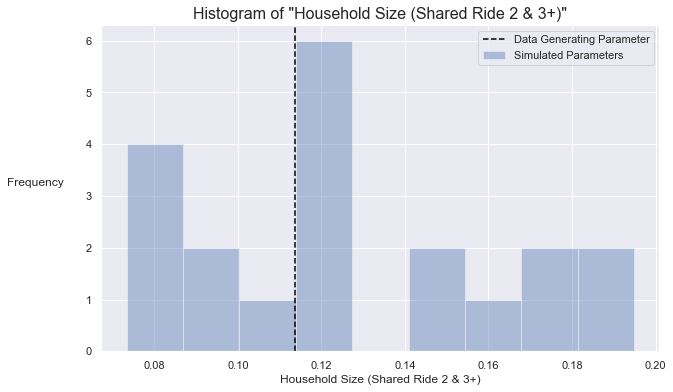

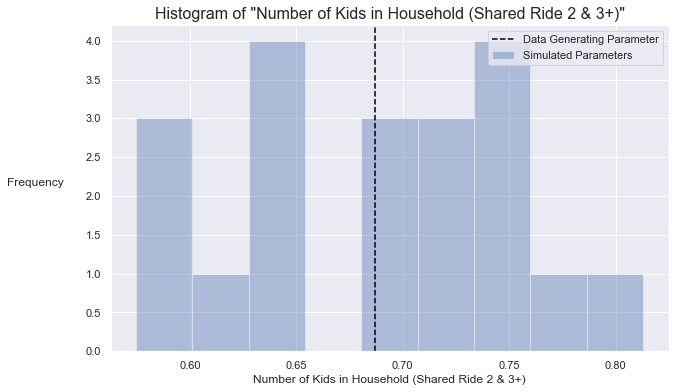

In [212]:
for par in df.columns:
    Plot(df[par],mnl_model, (10,6))